<span style="font-family: Verdana; font-weight:bold;font-size:1.3em;color:#B22222;"> Feature Selection, Model Selection and Tuning
    
<span style="font-family: Verdana; font-weight:bold;font-size:1.0em;color:#4682B4;"> Machine Learning and Artificial Intelligence Course - Texas University
    
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> RAFAEL SOARES DE CARVALHO

<span style="font-family: Verdana; font-weight:bold; font-size:1.2em;color:#B22222;">  Objective: 

To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<span style="font-family: Verdana;font-size:1.2em;color:#B22222;">  Task 1 - Exploratory data quality report
    
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> 1. Univariate analysis
    
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> 2. Multivariate analysis
    
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> 3. Feature Engineering

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### Previus Run - Imports Data, Libraries and functions for analysis

In [1]:
#Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np   

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score,roc_curve
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb

import statsmodels.api as sm

import pandas as pd    

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns

import scipy.stats as stats

from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
from os import system

import multiprocessing
from itertools import product

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import GridSearchCV

from sklearn import model_selection
# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

#pip install graphviz
#conda install -c conda-forge mlxtend





Bad key "text.kerning_factor" on line 4 in
C:\Users\11388\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Data

In [2]:
#Import Dataset
original_dataset = pd.read_csv("concrete.csv")  # data as it is - to check consistency
data = pd.read_csv("concrete.csv") # data to be manipulated

In [3]:
#Check import consistency
data.shape
#Review: Import Validated 1.03k regs and 9 information collumns

(1030, 9)

### 1 - Exploratory Data Quality Report - UNIVARIATE ANALYSIS

In [4]:
#top10 view
data.head(20)
#top 10 rows for data exploration

# Numerical data, named collumns, lot of "zeros" information, most double numbers.

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.30 212.00   0.00 203.50          0.00     971.80   748.50   28   
1   168.90  42.20 124.30 158.30         10.80   1,080.80   796.20   14   
2   250.00   0.00  95.70 187.40          5.50     956.90   861.20   28   
3   266.00 114.00   0.00 228.00          0.00     932.00   670.00   28   
4   154.80 183.40   0.00 193.30          9.10   1,047.40   696.70   28   
5   255.00   0.00   0.00 192.00          0.00     889.80   945.00   90   
6   166.80 250.20   0.00 203.50          0.00     975.60   692.60    7   
7   251.40   0.00 118.30 188.50          6.40   1,028.40   757.70   56   
8   296.00   0.00   0.00 192.00          0.00   1,085.00   765.00   28   
9   155.00 184.00 143.00 194.00          9.00     880.00   699.00   28   
10  151.80 178.10 138.70 167.50         18.30     944.00   694.60   28   
11  173.00 116.00   0.00 192.00          0.00     946.80   856.80    3   
12  385.00   0.00   0.00 186.00          0.00     966.00   763.00   14   
13  237.50 237.50   0.00 228.00          0.00     932.00   594.00    7   
14  167.00 187.00 195.00 185.00          7.00     898.00   636.00   28   
15  213.80  98.10  24.50 181.70          6.70   1,066.00   785.50  100   
16  237.50 237.50   0.00 228.00          0.00     932.00   594.00   28   
17  336.00   0.00   0.00 182.00          3.00     986.00   817.00   28   
18  190.70   0.00 125.40 162.10          7.80   1,090.00   804.00    3   
19  312.70   0.00   0.00 178.10          8.00     999.70   822.20   28   

    strength  
0      29.89  
1      23.51  
2      29.22  
3      45.85  
4      18.29  
5      21.86  
6      15.75  
7      36.64  
8      21.65  
9      28.99  
10     36.35  
11      6.94  
12     27.92  
13     26.26  
14     23.89  
15     49.97  
16     30.08  
17     44.86  
18     15.04  
19     25.10

In [5]:
#Check Data Types
data.dtypes

# No need to change data types for now

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [6]:
#Statistical information and summary
data.describe()

cement     slag      ash    water  superplastic  coarseagg  fineagg  \
count 1,030.00 1,030.00 1,030.00 1,030.00      1,030.00   1,030.00 1,030.00   
mean    281.17    73.90    54.19   181.57          6.20     972.92   773.58   
std     104.51    86.28    64.00    21.35          5.97      77.75    80.18   
min     102.00     0.00     0.00   121.80          0.00     801.00   594.00   
25%     192.38     0.00     0.00   164.90          0.00     932.00   730.95   
50%     272.90    22.00     0.00   185.00          6.40     968.00   779.50   
75%     350.00   142.95   118.30   192.00         10.20   1,029.40   824.00   
max     540.00   359.40   200.10   247.00         32.20   1,145.00   992.60   

           age  strength  
count 1,030.00  1,030.00  
mean     45.66     35.82  
std      63.17     16.71  
min       1.00      2.33  
25%       7.00     23.71  
50%      28.00     34.45  
75%      56.00     46.14  
max     365.00     82.60

In [7]:
#Check Data Infos
data.info()

# there are not nulls values - float64(8 collums), int64(1 collumn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
#Check Duplicated Rows
dup = data.duplicated()
sum(dup)
#There are 25 duplicated

25

In [9]:
#remove Duplicated Rows
data_work = original_dataset.copy()
data_work['dup'] = dup
excluded_dups = data_work.loc[(data_work['dup'] == True)] #to control removed data

data.drop_duplicates(keep='first', inplace=False)

print('Rows in Original dataset',original_dataset.shape[0])
print('Rows in Duplicated rows',excluded_dups.shape[0])
print('Rows in Adjusted dataset', data.shape[0])


Rows in Original dataset 1030
Rows in Duplicated rows 25
Rows in Adjusted dataset 1030


In [10]:
# Create a collum Months for Age understand
data['age_months'] =  np.floor(data.age/30)


In [11]:
# Create a collumn for quantile the strength to better view of data

data['strength_quantile'] =  pd.qcut(data['strength'],4, labels=False)


In [12]:
# Create a collumn to Age category
data.loc[data['age'] >= 90, 'age_category'] = 90 #90 or more
data.loc[data['age'] < 90, 'age_category'] = data['age']

In [13]:
# Create a collumn to ciment mix category
data.loc[data['superplastic'] == 0, 'contains_superplastic'] = 0
data.loc[data['superplastic'] > 0, 'contains_superplastic'] = 1

data.loc[data['ash'] == 0, 'contains_ash'] = 0
data.loc[data['ash'] > 0, 'contains_ash'] = 1

data.loc[data['slag'] == 0, 'contains_slag'] = 0
data.loc[data['slag'] > 0, 'contains_slag'] = 1

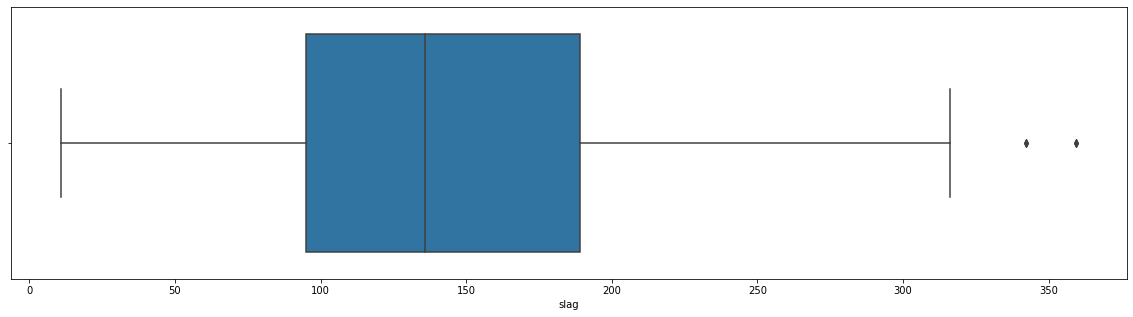

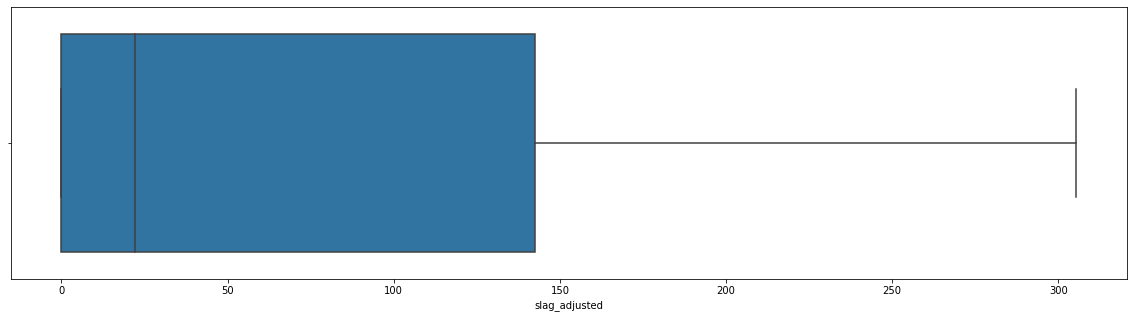

In [14]:
#SLAG 
details = data.loc[(data['slag'] > 0)]

plt.figure(figsize=(20,5))
sns.boxplot(details['slag'])
plt.show()    

data.loc[data['slag'] > 315, 'slag_adjusted'] = details['slag'].mean()
data.loc[data['slag'] <= 315, 'slag_adjusted'] = data['slag']

data

plt.figure(figsize=(20,5))
sns.boxplot(data['slag_adjusted'])
plt.show()    


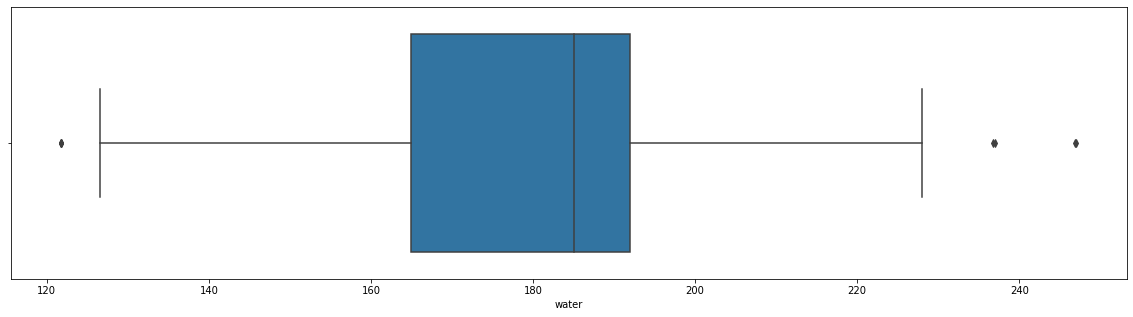

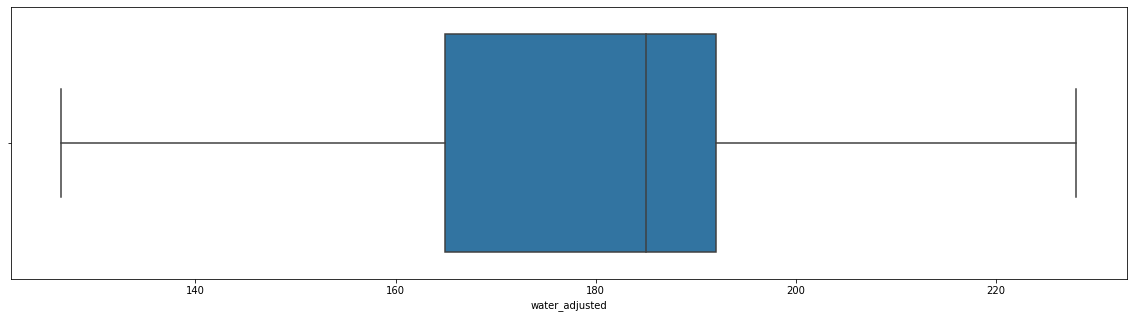

In [15]:
#WATER 
details = data.loc[(data['water'] > 0)]

plt.figure(figsize=(20,5))
sns.boxplot(details['water'])
plt.show()    

data.loc[data['water'] < 125, 'water_adjusted'] = details['water'].mean()
data.loc[data['water'] >= 125, 'water_adjusted'] = data['water']
data.loc[data['water'] > 230, 'water_adjusted'] = details['water'].mean()



#data

plt.figure(figsize=(20,5))
sns.boxplot(data['water_adjusted'])
plt.show()    

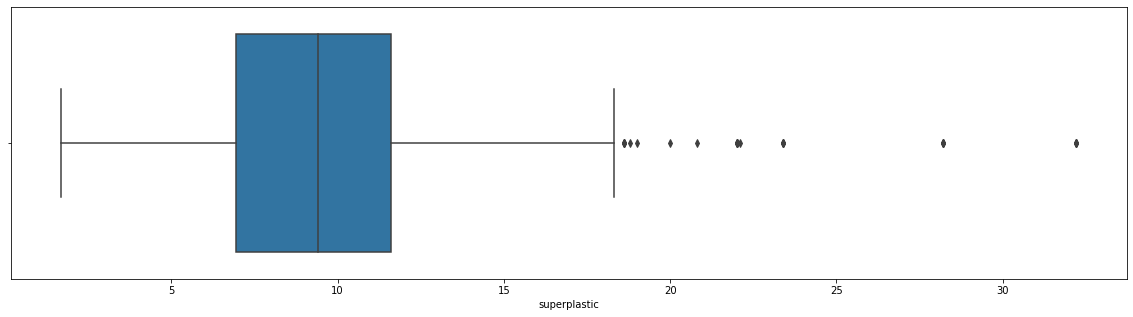

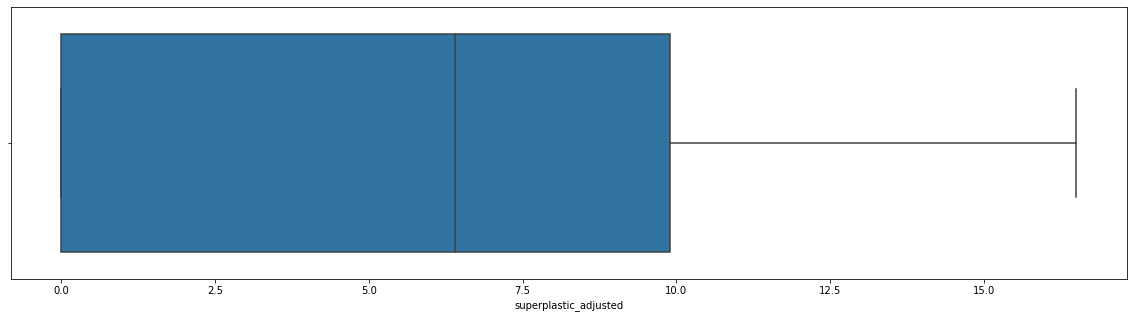

In [16]:
#superplastic 
details = data.loc[(data['superplastic'] > 0)]

plt.figure(figsize=(20,5))
sns.boxplot(details['superplastic'])
plt.show()    

data.loc[data['superplastic'] >= 17, 'superplastic_adjusted'] = details['superplastic'].mean()
data.loc[data['superplastic'] < 17, 'superplastic_adjusted'] = data['superplastic']
#data.loc[data['superplastic'] > 230, 'superplastic_adjusted'] = details['superplastic'].mean()



#data

plt.figure(figsize=(20,5))
sns.boxplot(data['superplastic_adjusted'])
plt.show()   

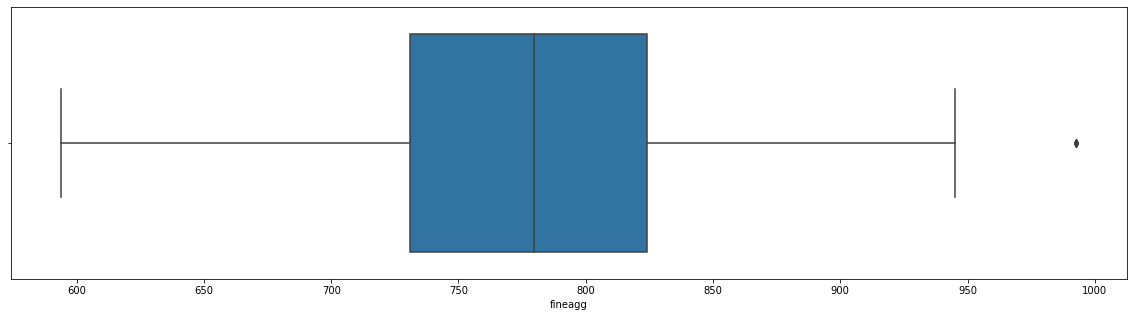

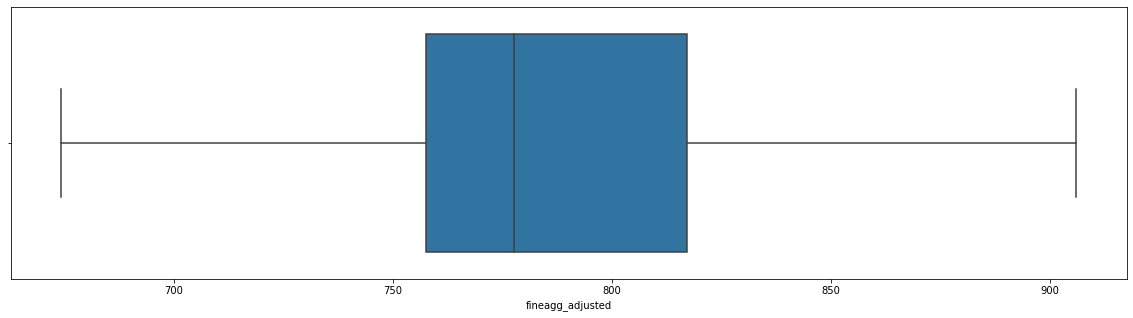

In [17]:
#fineagg 
details = data.loc[(data['fineagg'] > 0)]

plt.figure(figsize=(20,5))
sns.boxplot(details['fineagg'])
plt.show()    

data.loc[data['fineagg'] >= 920, 'fineagg_adjusted'] = details['fineagg'].mean()
data.loc[data['fineagg'] < 920, 'fineagg_adjusted'] = data['fineagg']
data.loc[data['fineagg'] <= 670, 'fineagg_adjusted'] = details['fineagg'].mean()
#data.loc[data['superplastic'] > 230, 'superplastic_adjusted'] = details['superplastic'].mean()



#data

plt.figure(figsize=(20,5))
sns.boxplot(data['fineagg_adjusted'])
plt.show()   

In [18]:
#Check for Nulls
nulls = data.isnull().any()
nulls
#Review: no missing values
#bank_adj.isnull().sum()

cement                   False
slag                     False
ash                      False
water                    False
superplastic             False
coarseagg                False
fineagg                  False
age                      False
strength                 False
age_months               False
strength_quantile        False
age_category             False
contains_superplastic    False
contains_ash             False
contains_slag            False
slag_adjusted            False
water_adjusted           False
superplastic_adjusted    False
fineagg_adjusted         False
dtype: bool

In [19]:
#IQR from each collumm
data.quantile(0.75) - data.quantile(0.25) 

cement                  157.62
slag                    142.95
ash                     118.30
water                    27.10
superplastic             10.20
coarseagg                97.40
fineagg                  93.05
age                      49.00
strength                 22.43
age_months                1.00
strength_quantile         2.50
age_category             49.00
contains_superplastic     1.00
contains_ash              1.00
contains_slag             1.00
slag_adjusted           142.50
water_adjusted           27.10
superplastic_adjusted     9.90
fineagg_adjusted         59.40
dtype: float64

In [20]:
#Standard Deviation
print(data.std())

cement                  104.51
slag                     86.28
ash                      64.00
water                    21.35
superplastic              5.97
coarseagg                77.75
fineagg                  80.18
age                      63.17
strength                 16.71
age_months                2.25
strength_quantile         1.12
age_category             29.60
contains_superplastic     0.48
contains_ash              0.50
contains_slag             0.50
slag_adjusted            83.98
water_adjusted           20.60
superplastic_adjusted     5.00
fineagg_adjusted         52.66
dtype: float64


In [21]:
#Covariance
cov_data = (data.cov())
cov_data

cement      slag       ash   water  superplastic  \
cement                10,921.58 -2,481.55 -2,658.30 -182.07         57.68   
slag                  -2,481.55  7,444.12 -1,786.69  197.60         22.30   
ash                   -2,658.30 -1,786.69  4,095.62 -351.20        144.32   
water                   -182.07    197.60   -351.20  456.00        -83.88   
superplastic              57.68     22.30    144.32  -83.88         35.69   
coarseagg               -888.55 -1,905.22    -49.57 -302.68       -123.55   
fineagg               -1,866.13 -1,948.00    405.91 -771.57        106.66   
age                      540.98   -241.15   -624.07  374.49        -72.72   
strength                 869.14    194.34   -113.06 -103.32         36.53   
age_months                23.94     -9.43    -27.45   13.38         -2.98   
strength_quantile         53.87     10.52     -5.96   -5.58          2.21   
age_category             111.75    -98.95   -115.24   83.16        -12.05   
contains_superplastic     -5.09     -0.41     19.20   -5.44          2.29   
contains_ash             -18.08    -14.42     29.81   -2.78          1.18   
contains_slag             -7.74     33.82     -3.84   -0.14          0.54   
slag_adjusted         -2,417.59  7,128.18 -1,722.53  192.71         29.65   
water_adjusted          -194.14    176.41   -329.45  424.40        -83.97   
superplastic_adjusted     -0.85     12.25    155.09  -67.07         26.93   
fineagg_adjusted        -472.67 -1,347.22     74.07 -295.20         40.63   

                       coarseagg   fineagg      age  strength  age_months  \
cement                   -888.55 -1,866.13   540.98    869.14       23.94   
slag                   -1,905.22 -1,948.00  -241.15    194.34       -9.43   
ash                       -49.57    405.91  -624.07   -113.06      -27.45   
water                    -302.68   -771.57   374.49   -103.32       13.38   
superplastic             -123.55    106.66   -72.72     36.53       -2.98   
coarseagg               6,045.68 -1,112.65   -14.81   -214.24        2.91   
fineagg                -1,112.65  6,428.19  -790.57   -224.00      -26.03   
age                       -14.81   -790.57 3,990.44    347.06      139.91   
strength                 -214.24   -224.00   347.06    279.08       10.44   
age_months                  2.91    -26.03   139.91     10.44        5.04   
strength_quantile         -14.12    -16.12    24.93     17.48        0.77   
age_category                5.71   -145.56 1,450.18    254.78       50.25   
contains_superplastic      -7.78      6.49    -7.48      2.32       -0.32   
contains_ash               -0.24      4.80    -5.16     -0.52       -0.22   
contains_slag             -14.25     -8.97    -1.00      1.93       -0.04   
slag_adjusted          -1,886.21 -1,831.36  -207.81    199.91       -8.28   
water_adjusted           -251.33   -747.07   377.05   -105.67       13.56   
superplastic_adjusted     -83.10     80.12   -67.75     28.54       -2.82   
fineagg_adjusted         -411.56  2,986.17   195.97    -64.62        8.80   

                       strength_quantile  age_category  contains_superplastic  \
cement                             53.87        111.75                  -5.09   
slag                               10.52        -98.95                  -0.41   
ash                                -5.96       -115.24                  19.20   
water                              -5.58         83.16                  -5.44   
superplastic                        2.21        -12.05                   2.29   
coarseagg                         -14.12          5.71                  -7.78   
fineagg                           -16.12       -145.56                   6.49   
age                                24.93      1,450.18                  -7.48   
strength                           17.48        254.78                   2.32   
age_months                          0.77         50.25                  -0.32   
strength_quantile                   1.25         17.

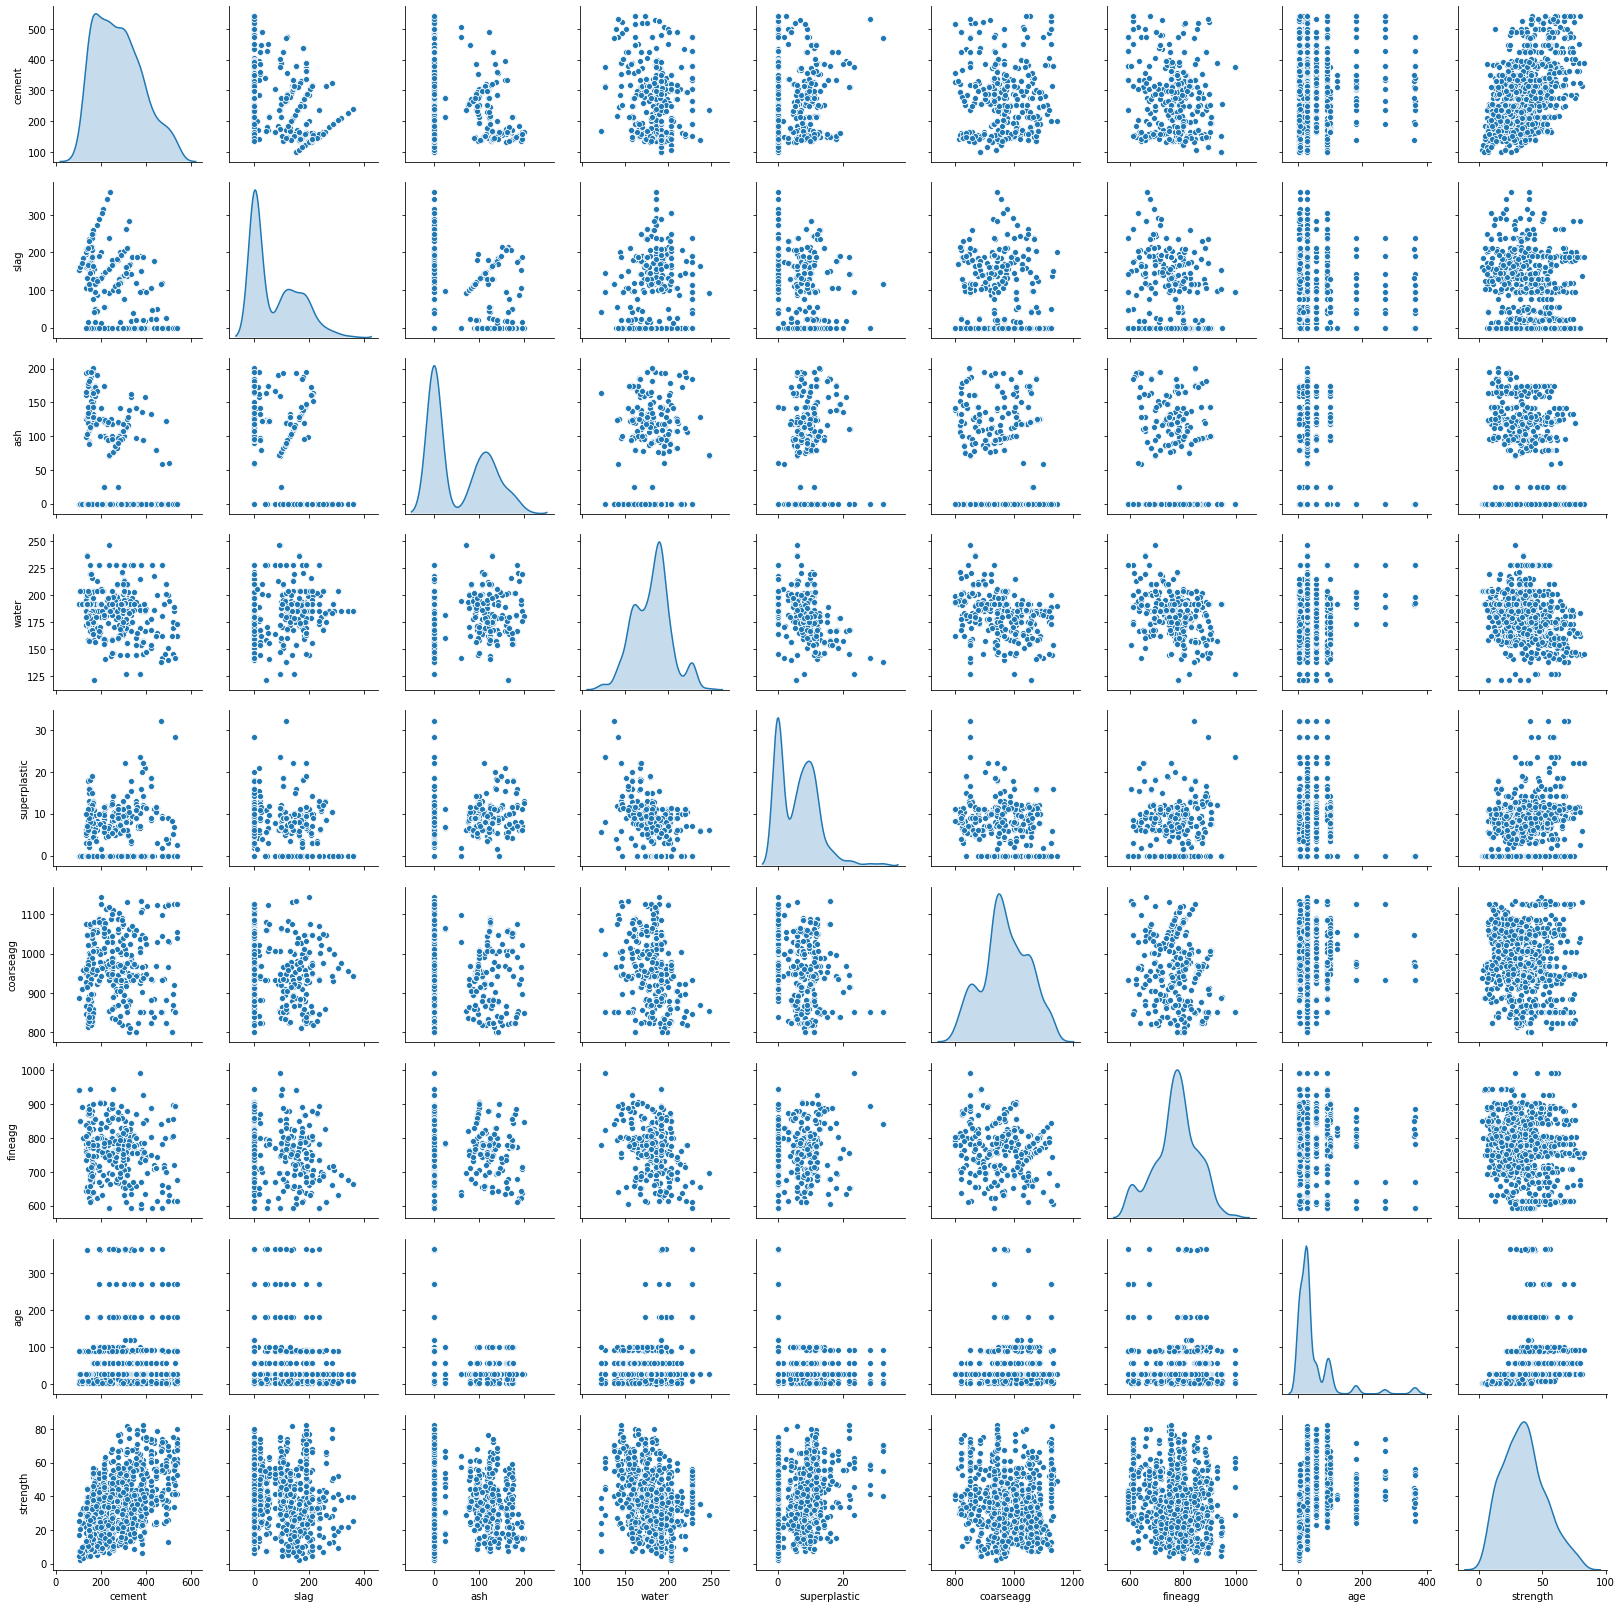

In [22]:
data_attr = data.iloc[:, 0:9]
sns.pairplot(data_attr, diag_kind='kde')

In [23]:
data.corr()

cement  slag   ash  water  superplastic  coarseagg  \
cement                   1.00 -0.28 -0.40  -0.08          0.09      -0.11   
slag                    -0.28  1.00 -0.32   0.11          0.04      -0.28   
ash                     -0.40 -0.32  1.00  -0.26          0.38      -0.01   
water                   -0.08  0.11 -0.26   1.00         -0.66      -0.18   
superplastic             0.09  0.04  0.38  -0.66          1.00      -0.27   
coarseagg               -0.11 -0.28 -0.01  -0.18         -0.27       1.00   
fineagg                 -0.22 -0.28  0.08  -0.45          0.22      -0.18   
age                      0.08 -0.04 -0.15   0.28         -0.19      -0.00   
strength                 0.50  0.13 -0.11  -0.29          0.37      -0.16   
age_months               0.10 -0.05 -0.19   0.28         -0.22       0.02   
strength_quantile        0.46  0.11 -0.08  -0.23          0.33      -0.16   
age_category             0.04 -0.04 -0.06   0.13         -0.07       0.00   
contains_superplastic   -0.10 -0.01  0.62  -0.53          0.79      -0.21   
contains_ash            -0.35 -0.34  0.94  -0.26          0.40      -0.01   
contains_slag           -0.15  0.79 -0.12  -0.01          0.18      -0.37   
slag_adjusted           -0.28  0.98 -0.32   0.11          0.06      -0.29   
water_adjusted          -0.09  0.10 -0.25   0.96         -0.68      -0.16   
superplastic_adjusted   -0.00  0.03  0.48  -0.63          0.90      -0.21   
fineagg_adjusted        -0.09 -0.30  0.02  -0.26          0.13      -0.10   

                       fineagg   age  strength  age_months  strength_quantile  \
cement                   -0.22  0.08      0.50        0.10               0.46   
slag                     -0.28 -0.04      0.13       -0.05               0.11   
ash                       0.08 -0.15     -0.11       -0.19              -0.08   
water                    -0.45  0.28     -0.29        0.28              -0.23   
superplastic              0.22 -0.19      0.37       -0.22               0.33   
coarseagg                -0.18 -0.00     -0.16        0.02              -0.16   
fineagg                   1.00 -0.16     -0.17       -0.14              -0.18   
age                      -0.16  1.00      0.33        0.99               0.35   
strength                 -0.17  0.33      1.00        0.28               0.93   
age_months               -0.14  0.99      0.28        1.00               0.31   
strength_quantile        -0.18  0.35      0.93        0.31               1.00   
age_category             -0.06  0.78      0.52        0.76               0.52   
contains_superplastic     0.17 -0.25      0.29       -0.29               0.26   
contains_ash              0.12 -0.16     -0.06       -0.20              -0.03   
contains_slag            -0.22 -0.03      0.23       -0.04               0.22   
slag_adjusted            -0.27 -0.04      0.14       -0.04               0.12   
water_adjusted           -0.45  0.29     -0.31        0.29              -0.25   
superplastic_adjusted     0.20 -0.21      0.34       -0.25               0.31   
fineagg_adjusted          0.71  0.06     -0.07        0.07              -0.07   

                       age_category  contains_superplastic  contains_ash  \
cement                         0.04                  -0.10         -0.35   
slag                          -0.04                  -0.01         -0.34   
ash                           -0.06                   0.62          0.94   
water                          0.13                  -0.53         -0.26   
superplastic                  -0.07                   0.79          0.40   
coarseagg                      0.00                  -0.21         -0.01   
fineagg                       -0.06                   0.17          0.12   
age                            0.78                  -0.25         -0.16   
strength                       0.52                   0.29         -0.06   
age_months                     0.76                  -0.29         -0.20   
strength_quantile        

In [24]:
#skewness of data
data.skew()

# simetric >-0.5 and <0.5
# moderate >-1 and <1
#  highly skewed < -1 or > 1


cement                   0.51
slag                     0.80
ash                      0.54
water                    0.07
superplastic             0.91
coarseagg               -0.04
fineagg                 -0.25
age                      3.27
strength                 0.42
age_months               3.21
strength_quantile        0.00
age_category             0.90
contains_superplastic   -0.55
contains_ash             0.20
contains_slag           -0.17
slag_adjusted            0.73
water_adjusted           0.09
superplastic_adjusted    0.12
fineagg_adjusted         0.33
dtype: float64

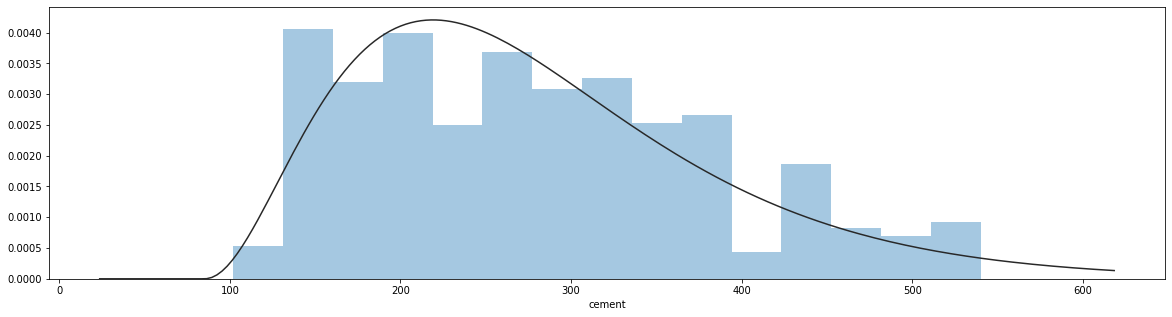

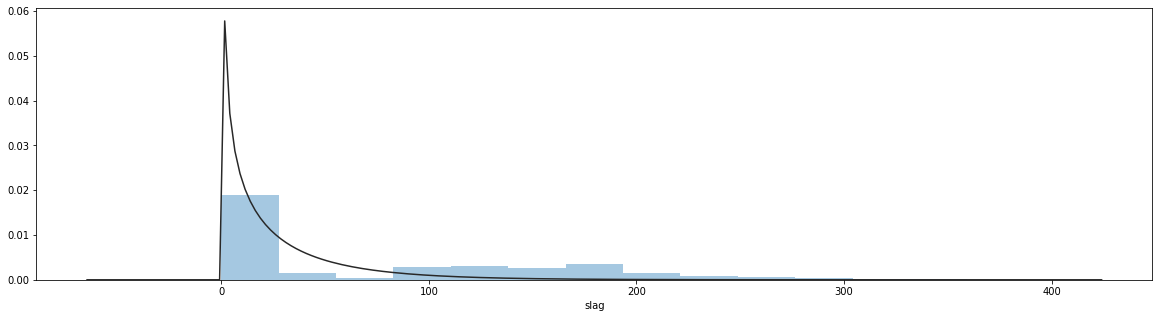

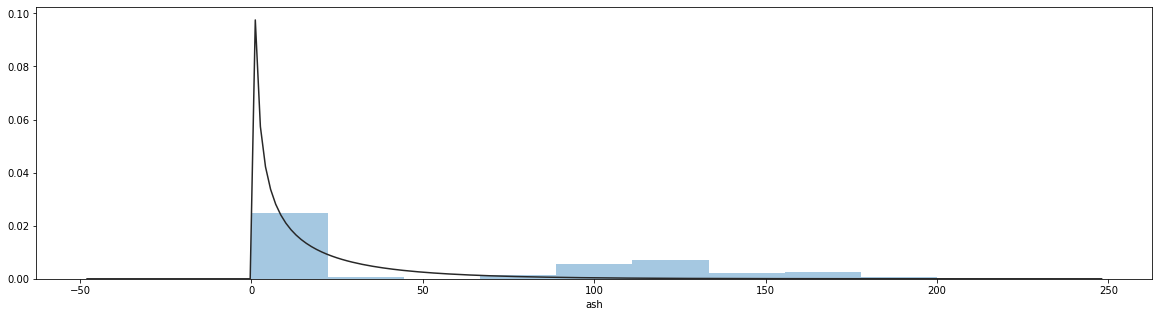

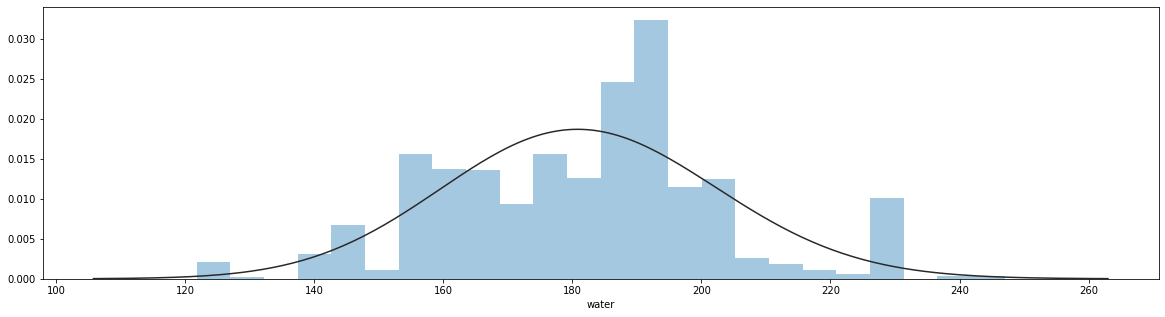

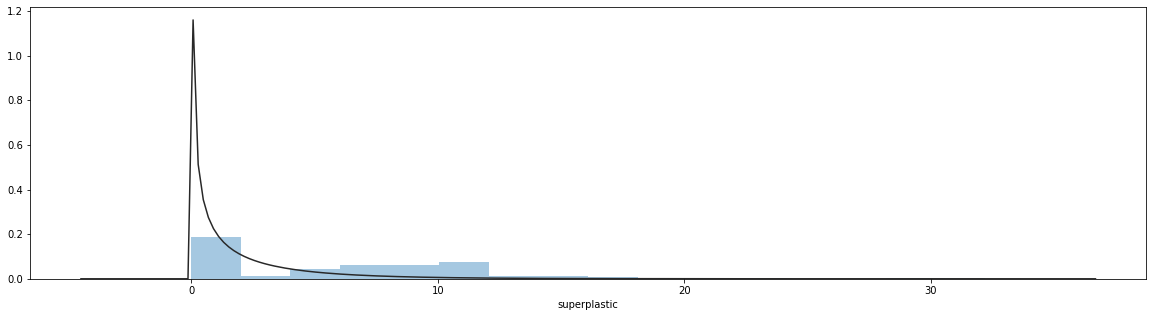

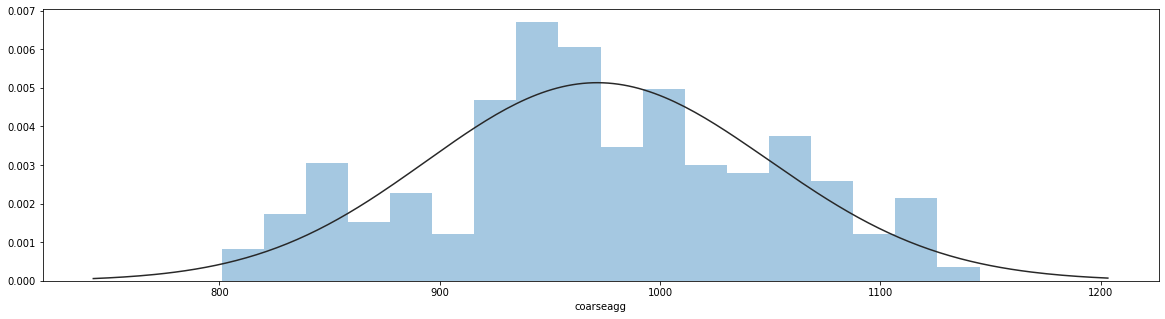

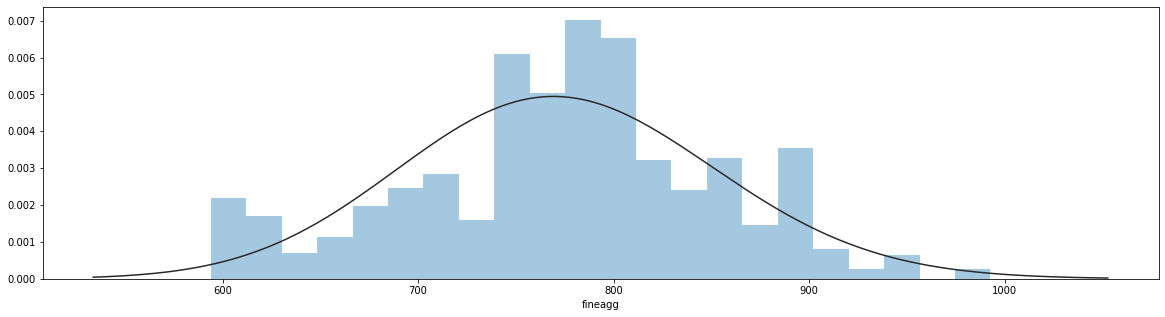

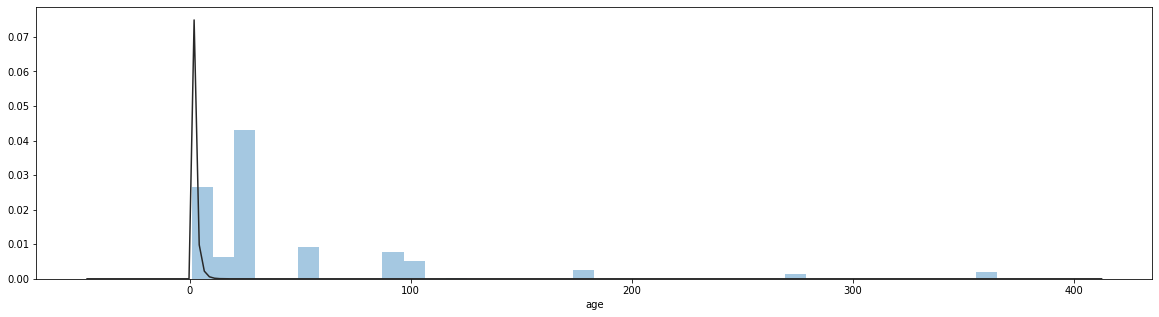

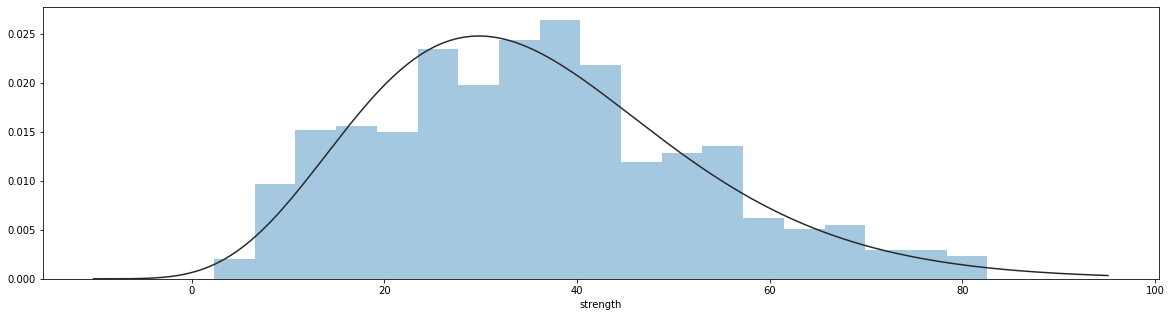

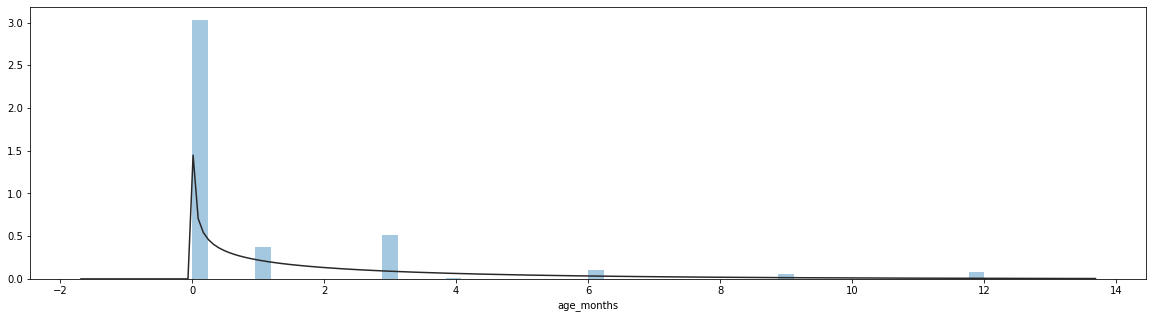

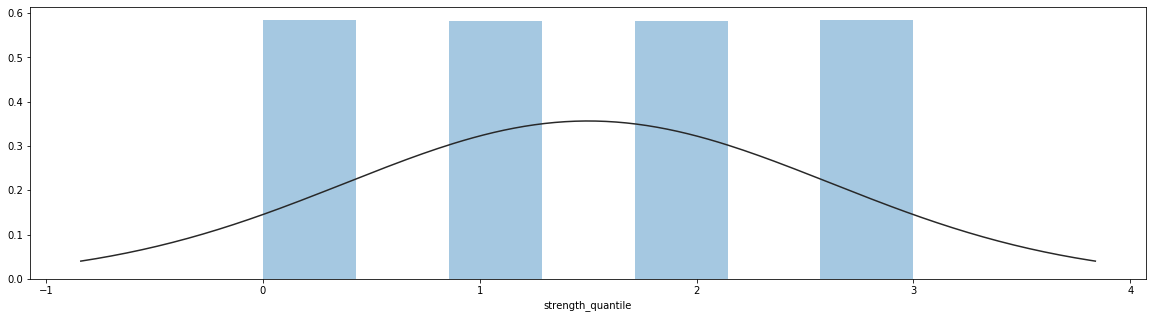

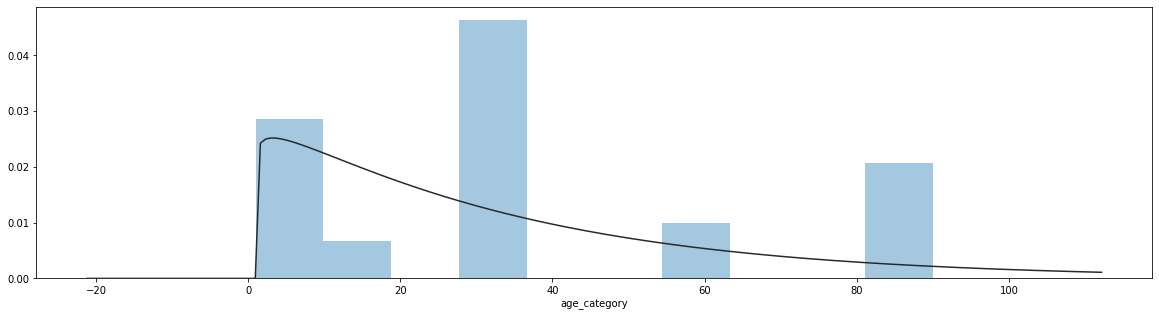

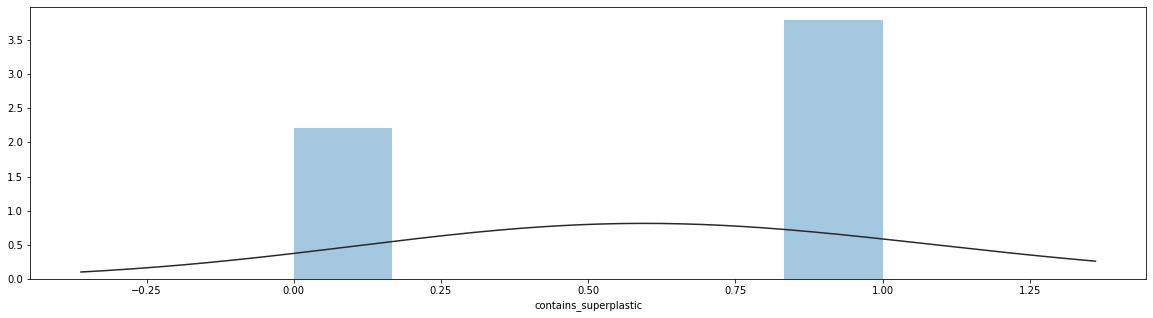

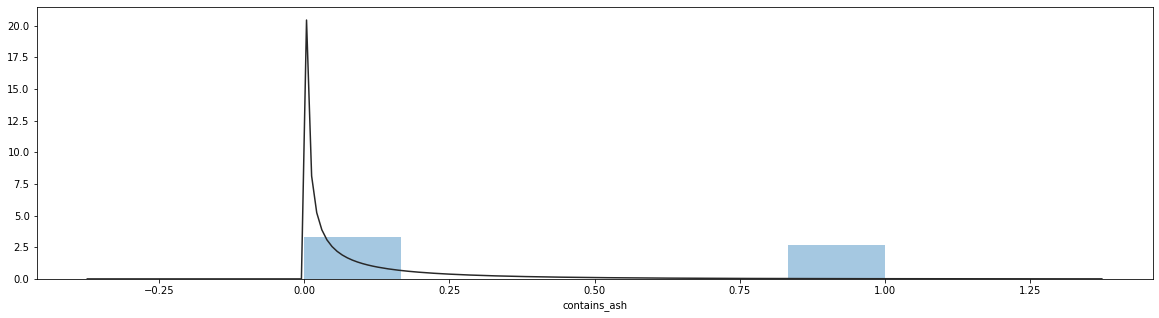

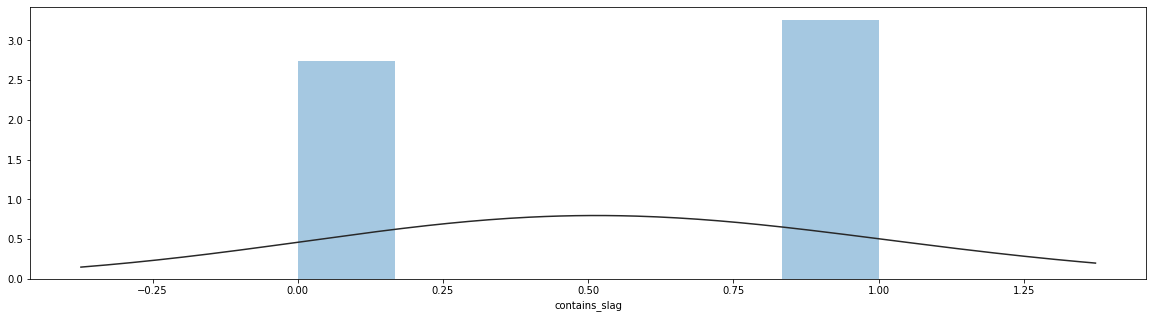

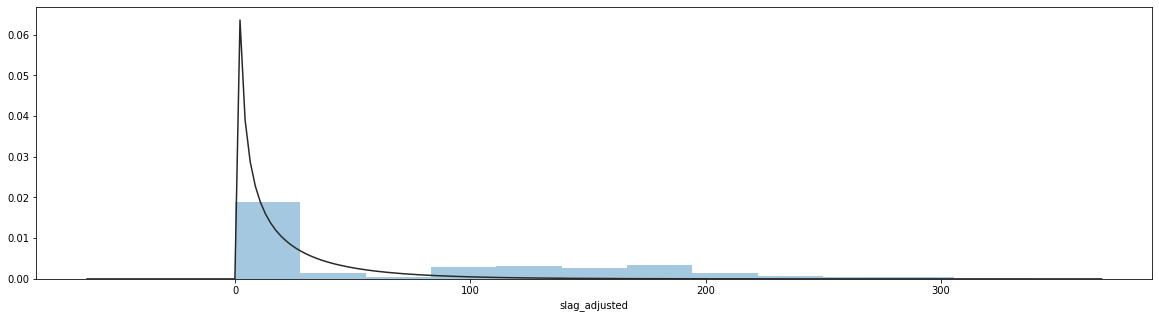

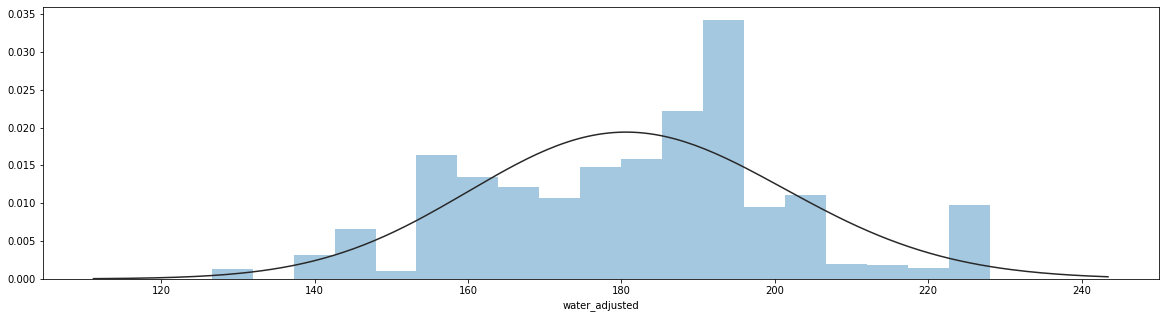

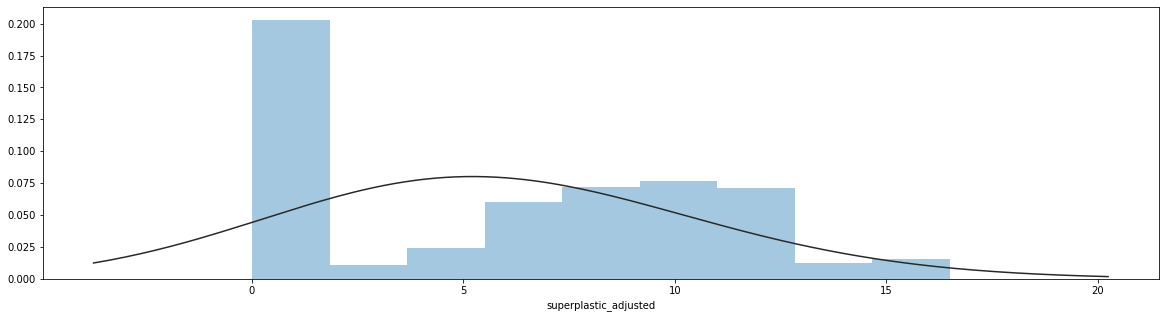

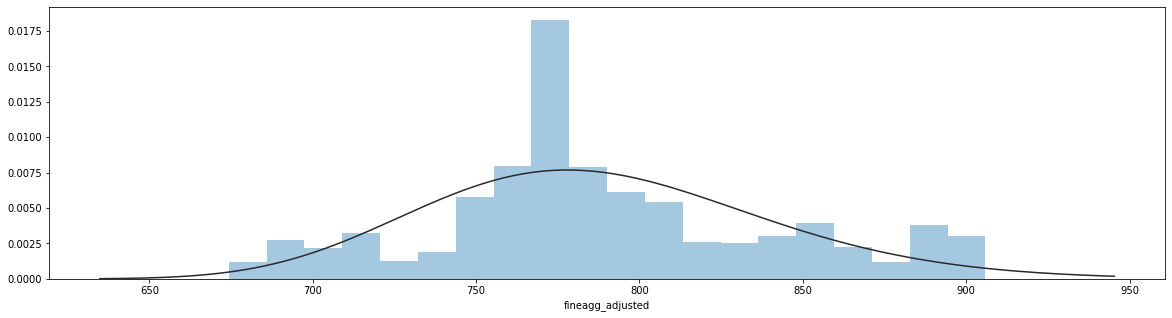

In [25]:
# Distplot for each collumn
for x, y in enumerate(data):
    plt.figure(figsize=(20,5))
    sns.distplot(data[y],fit=stats.gamma,kde=False)
    plt.show()    

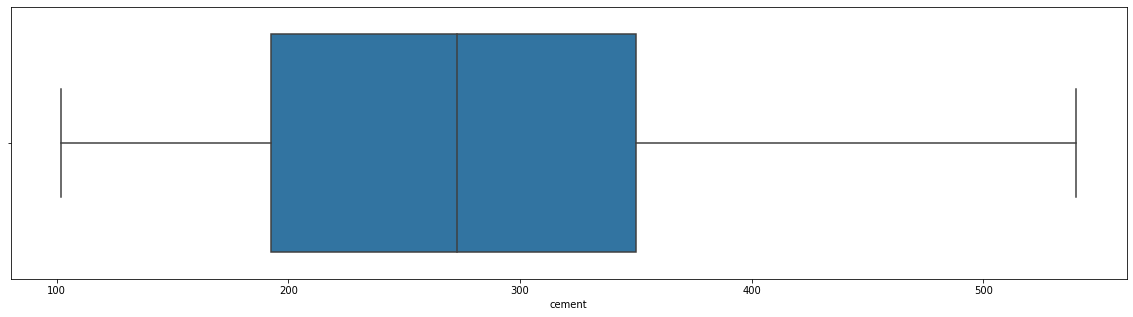

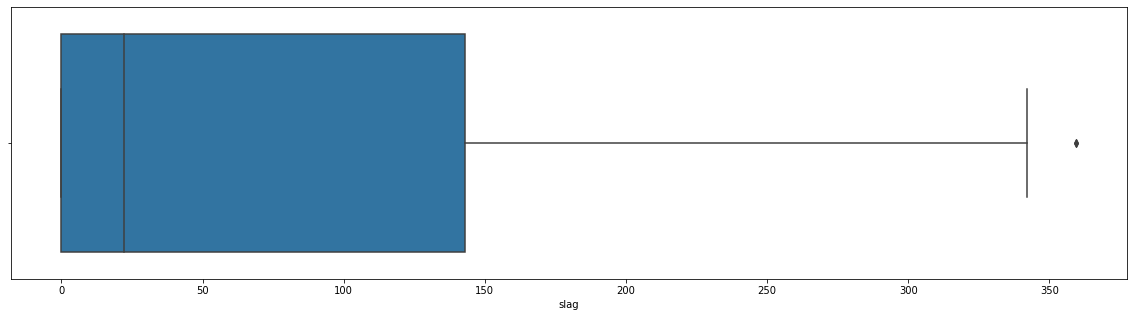

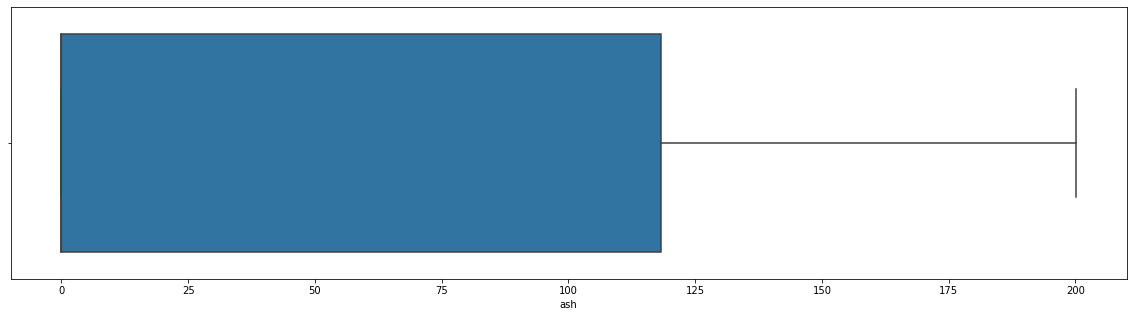

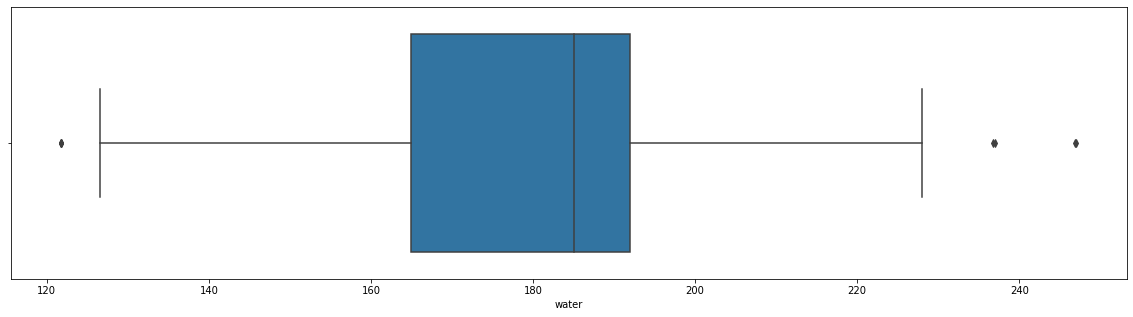

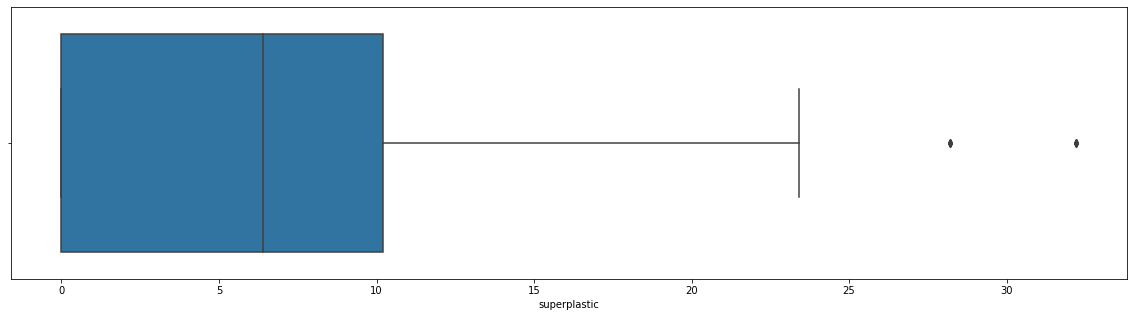

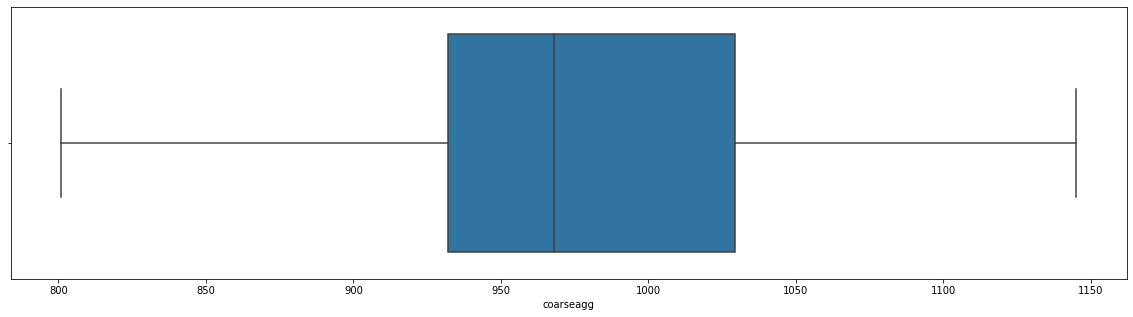

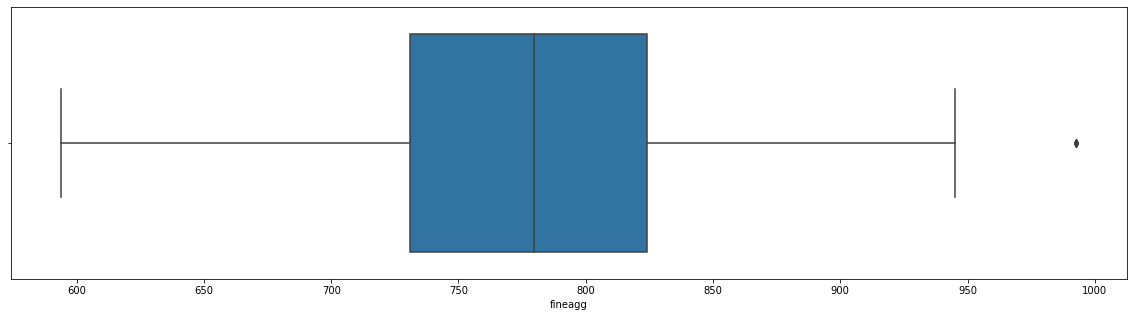

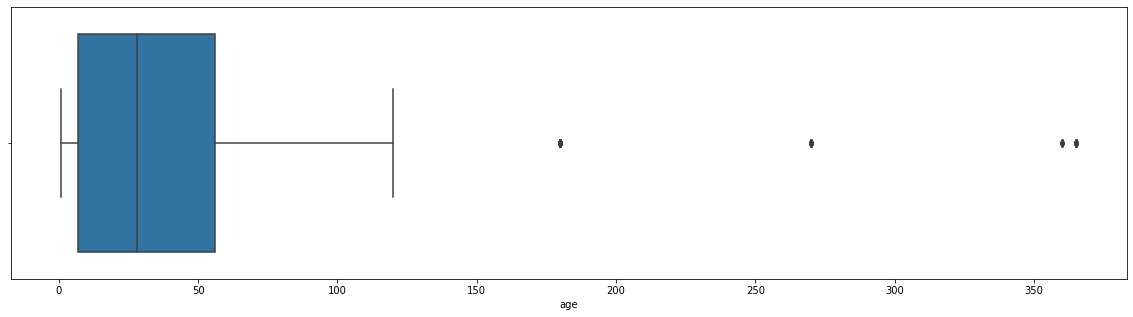

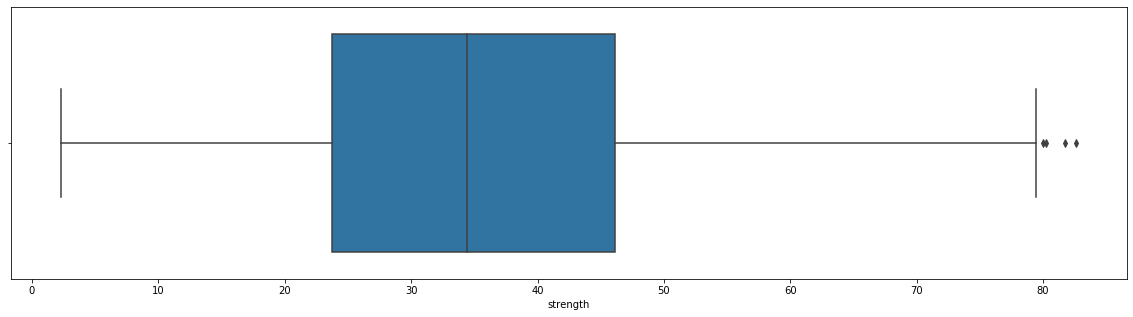

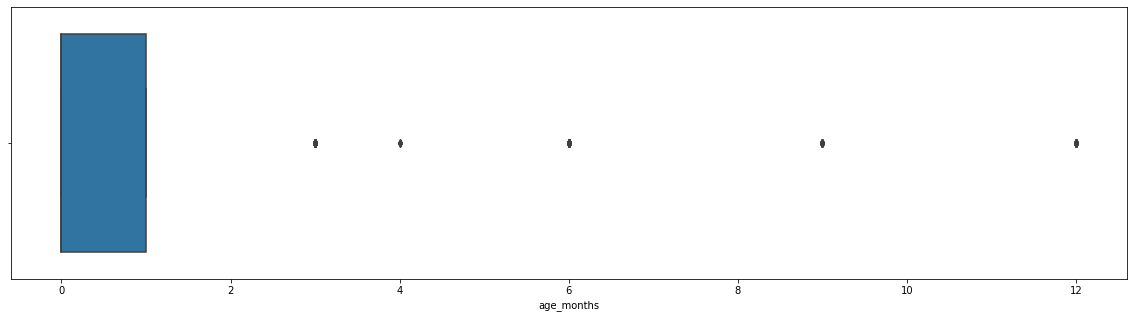

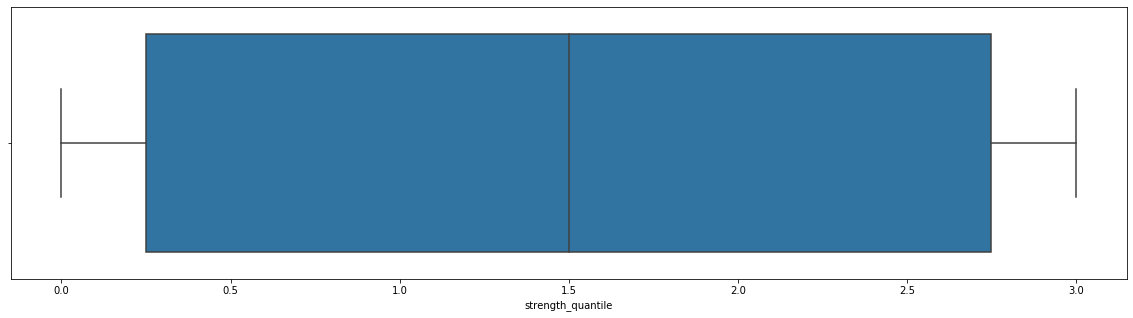

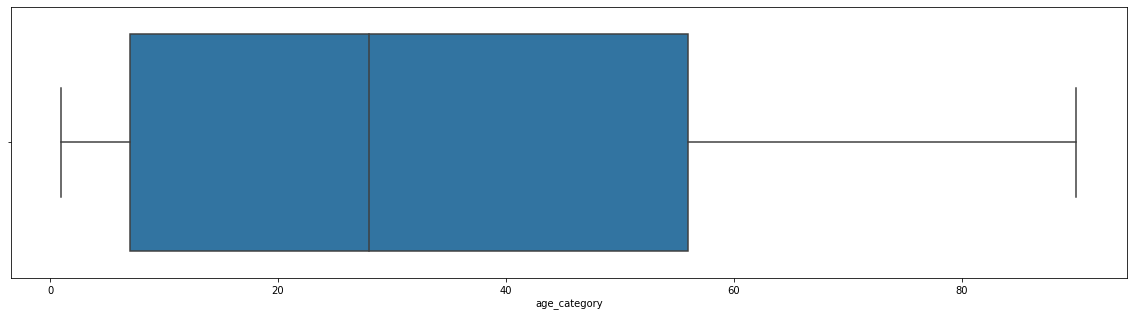

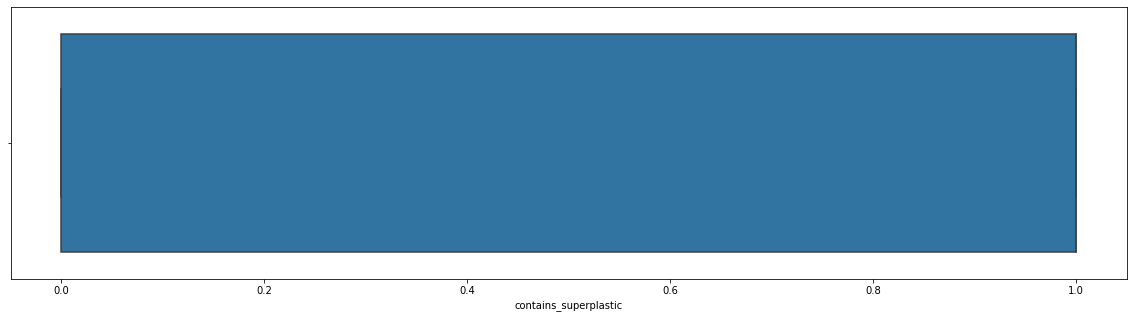

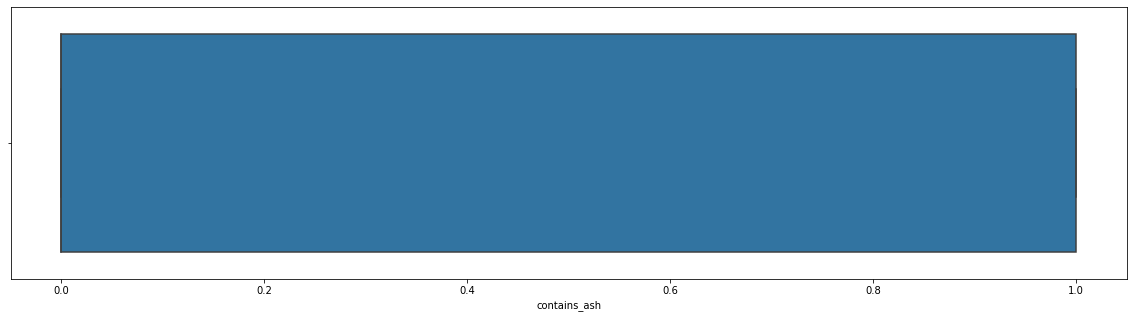

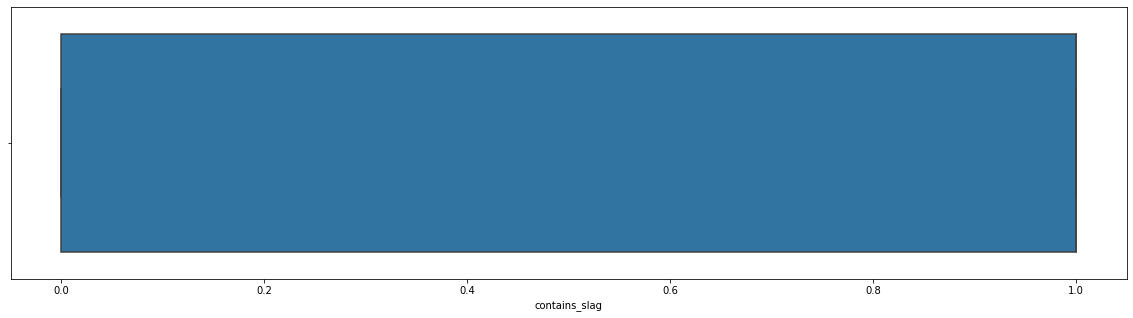

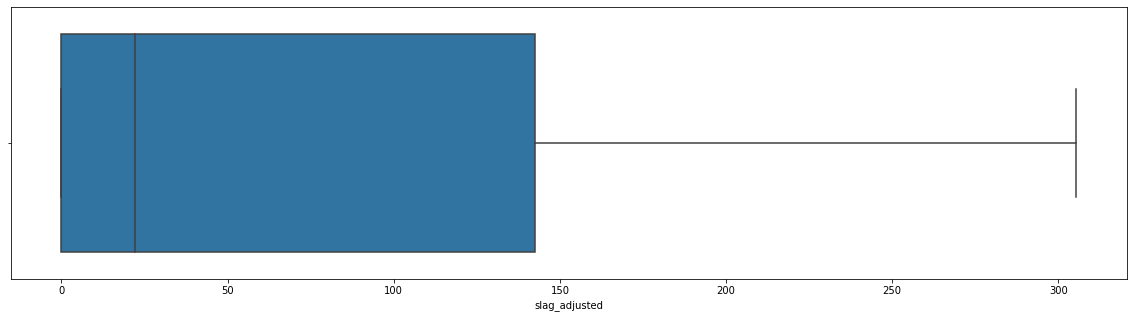

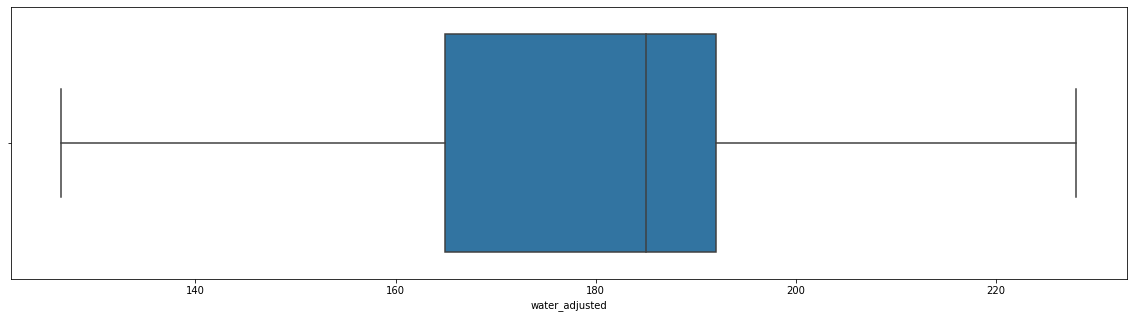

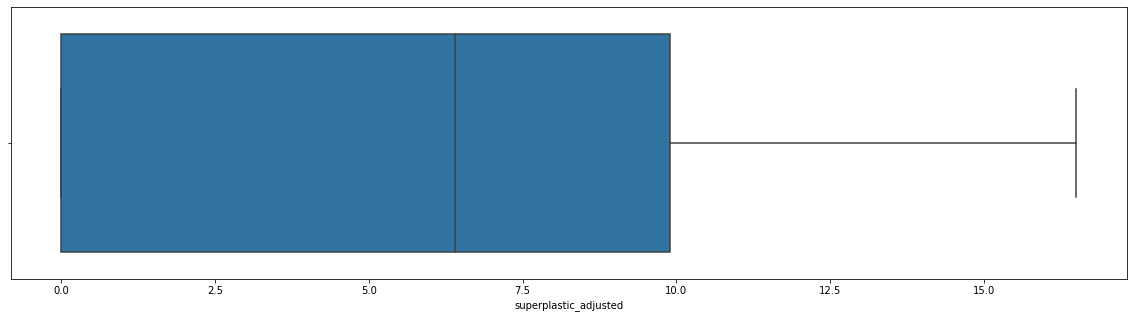

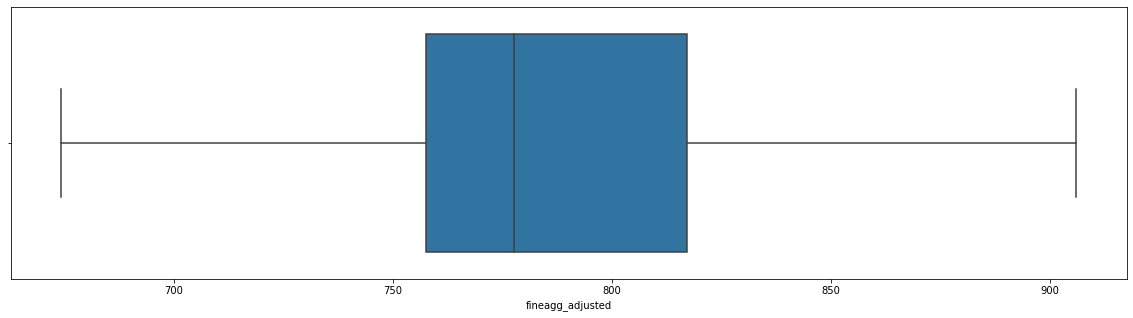

In [26]:
# Boxplot for each collumn
for x, y in enumerate(data):
    plt.figure(figsize=(20,5))
    sns.boxplot(data[y])
    plt.show()    

<span style="font-family: Verdana;font-size:1.2em;color:#B22222;">  RESUME - Data Analysis and insights :

<span style="font-family: Verdana;font-size:1.2em;color:#B22222;">  Data Analysis-  Collumn by Collumn Analysis

    We have 1.030 rows in the Dataset, with 25 duplicated rows. They were delleted from DataSet.
    The original data are numerical. Most of data are double / float64.
    
    There is 9 collumns and they are named as:

         Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
         Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
         Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
         Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
         Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
         Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
         Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
         Age(age) -- quantitative -- Day (1~365) -- Input Variable
         Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

    Taking a look in the statistics of Data, we can see:
        There are no "null" values. But there are a lot of "Zeros" in: slag, superplastic and ash. 
        We can assume that Zeros in these columns is the same as "no addition" of the product in the cement mix.
        Using this analyse, we can create a categorical variable to mark if it has or not slag, superplastic and ash.
        
    Age is a variable from 0 to 365, but the most of numbers are fixed (there is no 1,2,3,.. but there is 1-3-7-14-28-56-+). So we can assume that we could use Age_Months as a categorical collumn. And we can transform data in a categorical data, using each of 1 to 56 + others (80/20 of data).
    
    The Skewness of Data and actions:
    
    Highly skewed:
    age                      3.27 - Transformed in Categorical data
    superplastic             0.91 - Trasnformed in Categorical data - excluding zero we have better fit
    slag                     0.80 - Trasnformed in Categorical data - excluding zero we have better fit
    ash                      0.54 - Trasnformed in Categorical data - excluding zero we have better fit
    cement                   0.51
    
    Symmetric:
    water                    0.07 
    coarseagg               -0.04
    fineagg                 -0.25

    strength                 0.42
    
    Collumns "xxx_adjusted" created without outliers -  superplastic, water, slag and fineagg.

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2 - Exploratory Data Quality Report - BIVARIATE ANALYSIS

<span style="font-family: Verdana;font-size:1em;color:#E41414;"> ANALYSIS before the graphs,  in this standard of information.

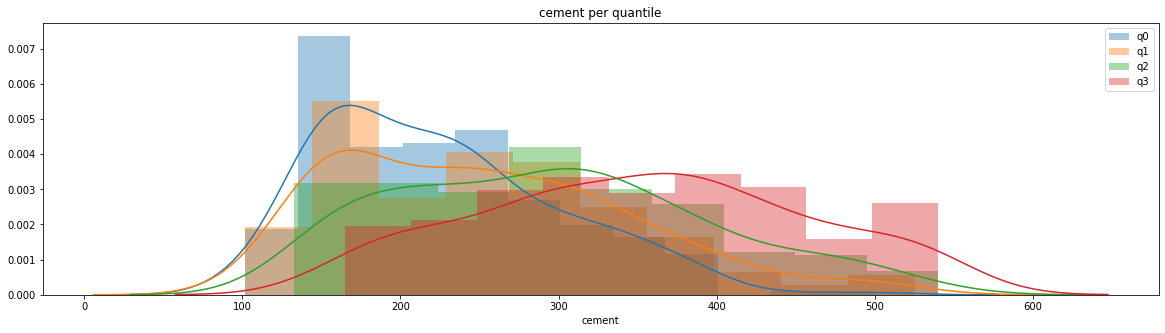

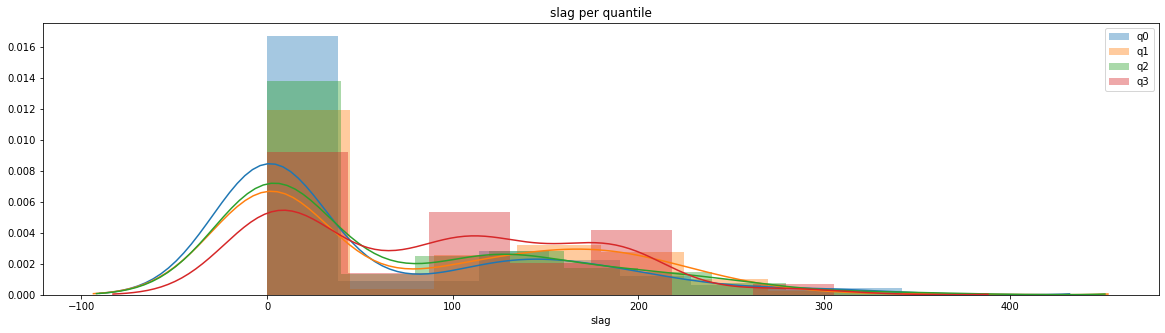

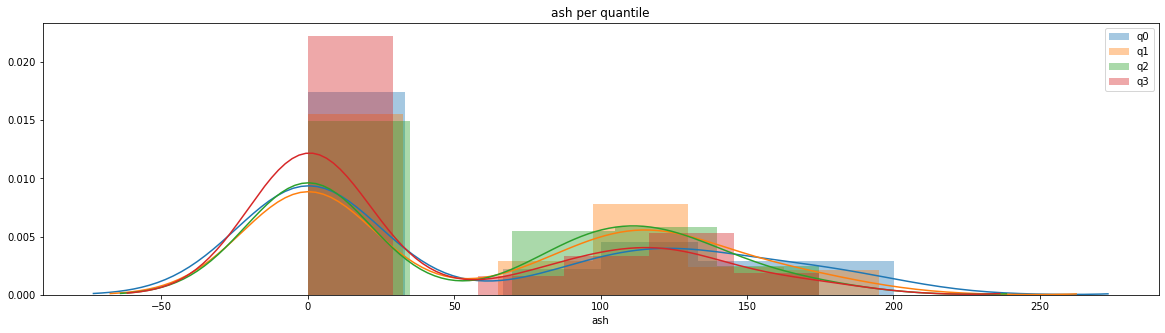

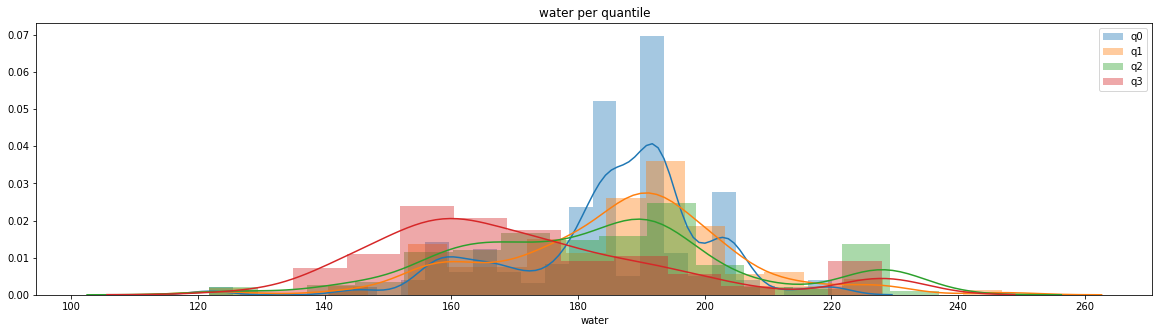

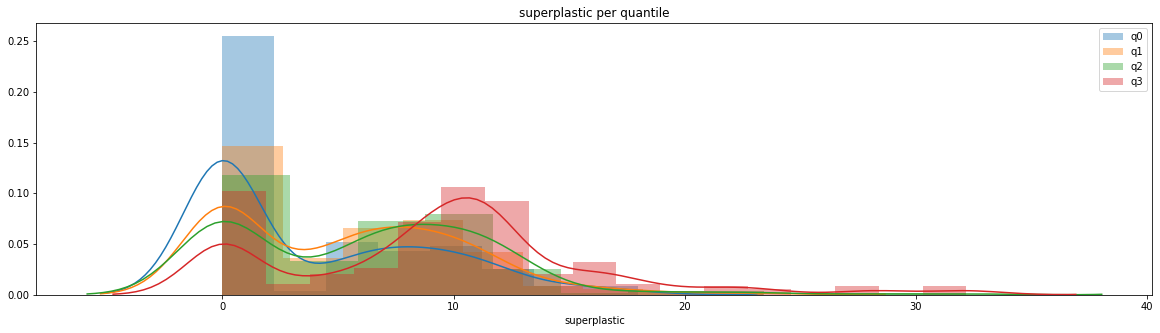

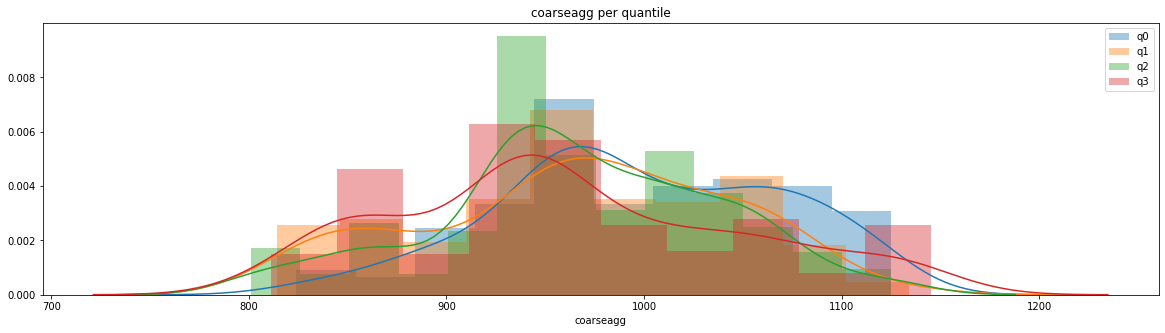

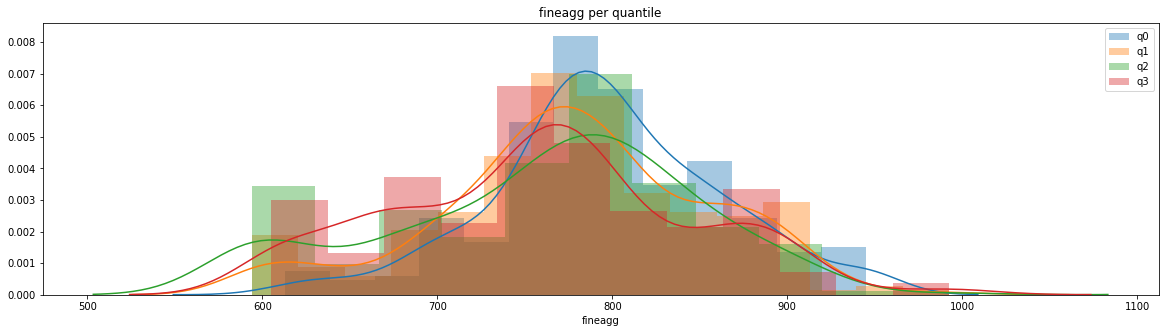

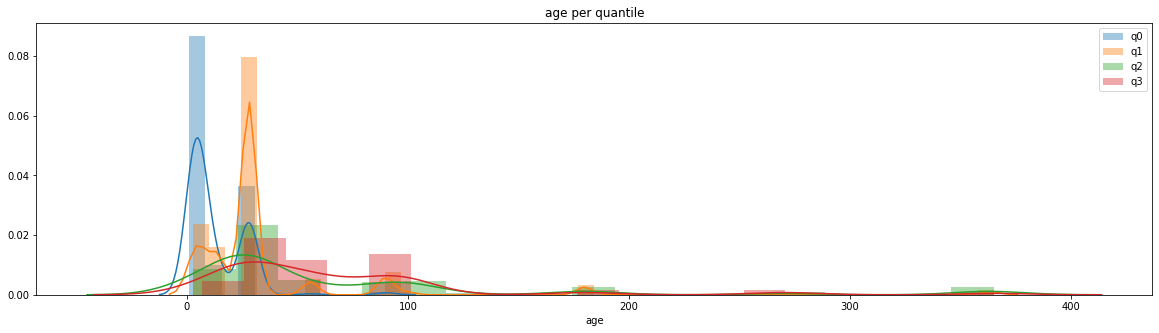

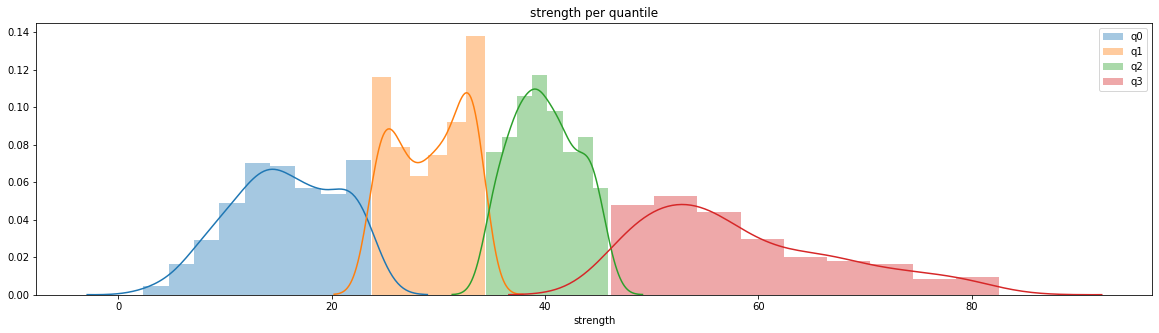

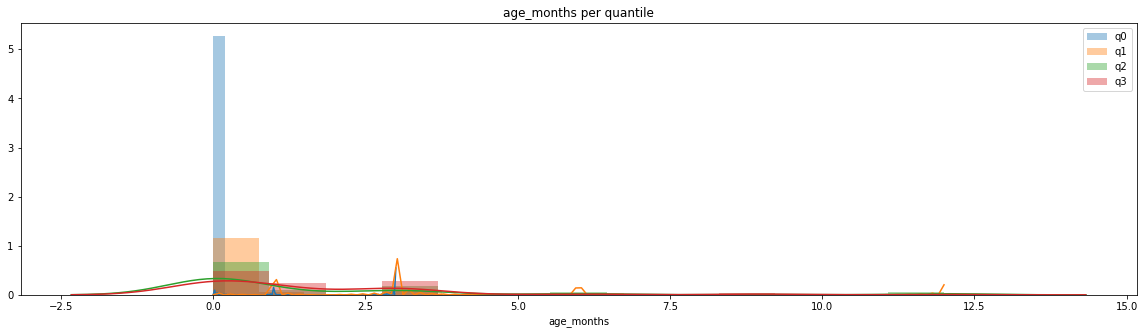

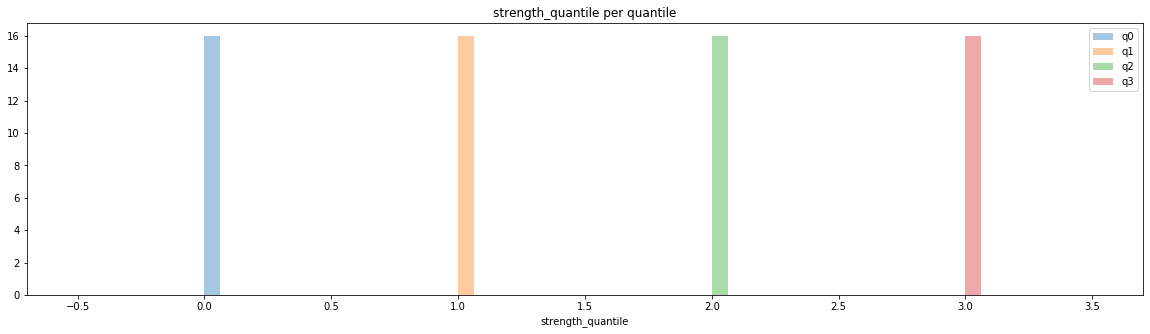

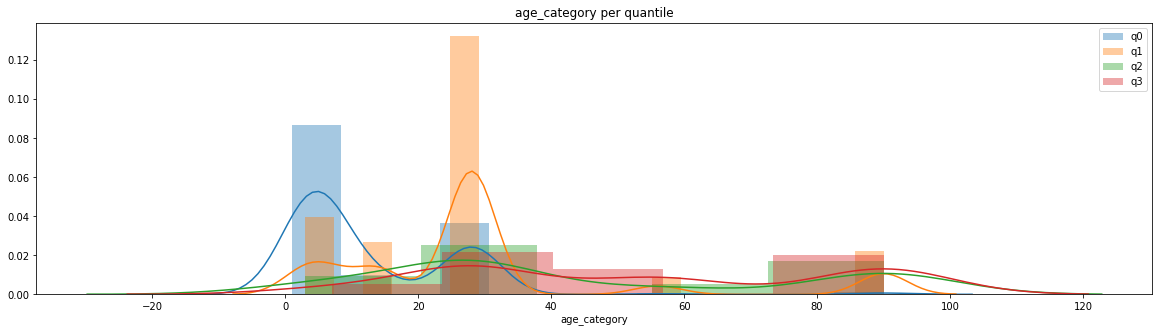

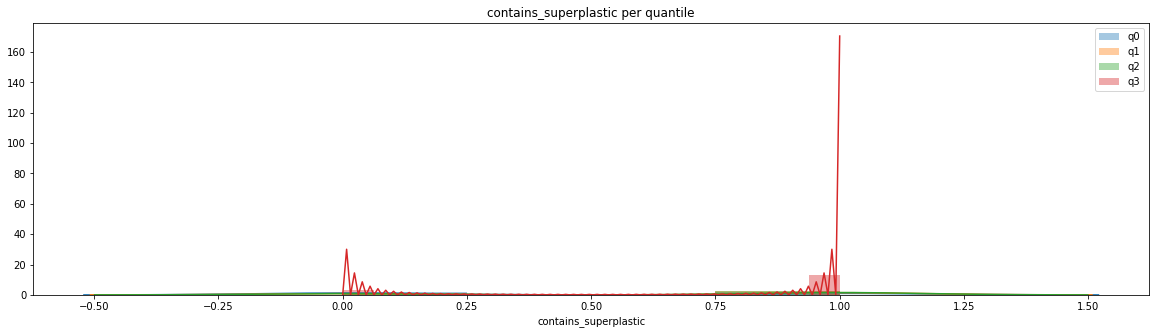

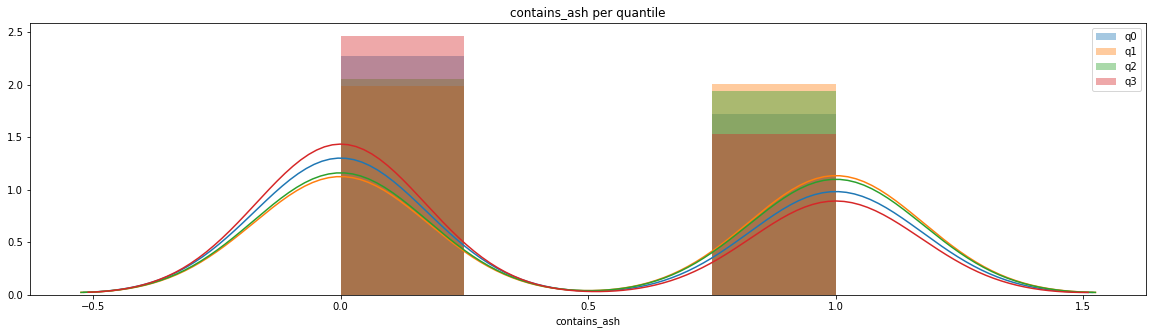

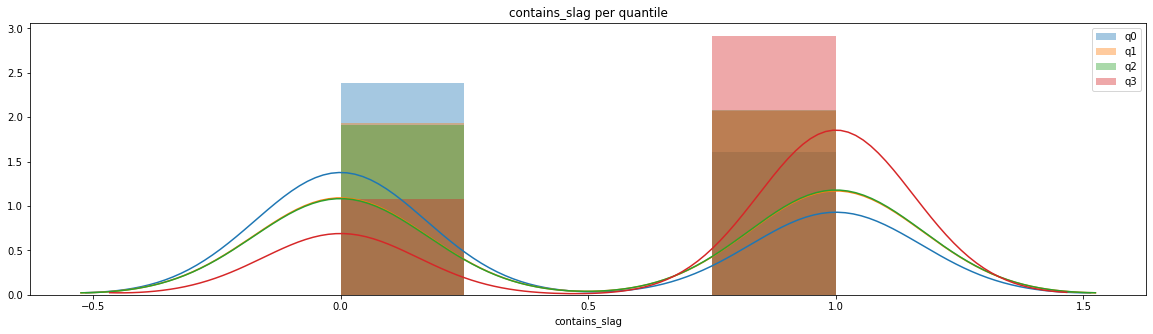

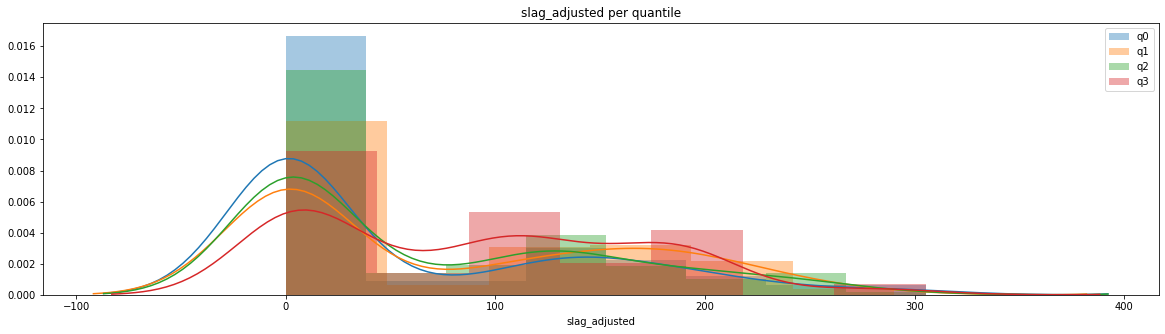

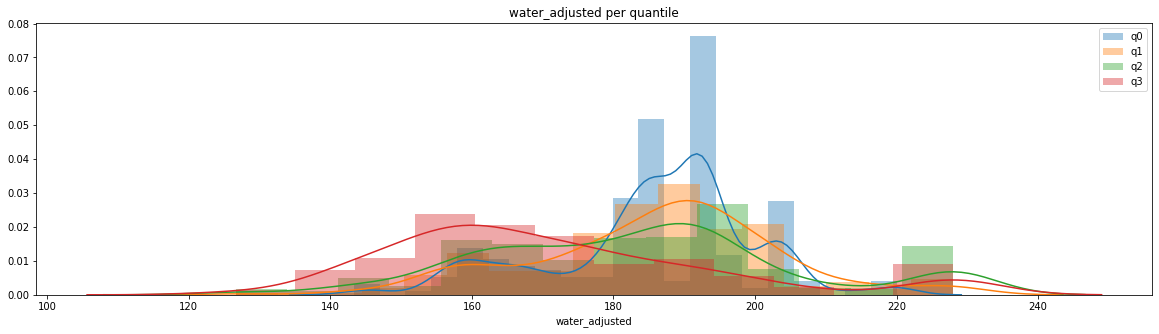

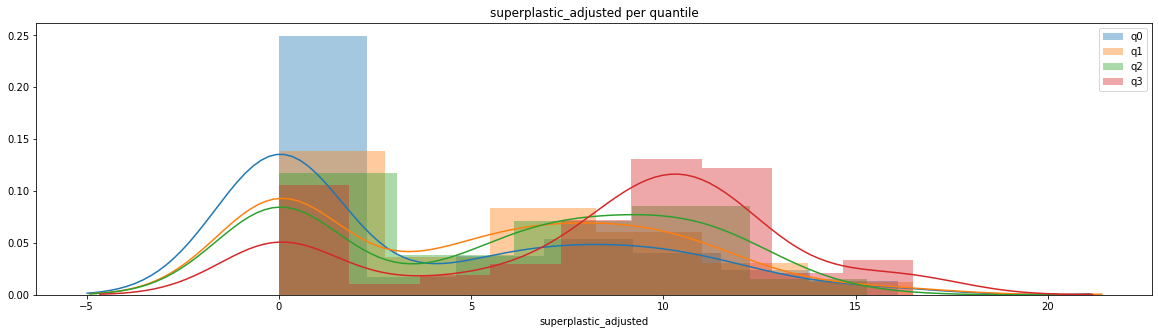

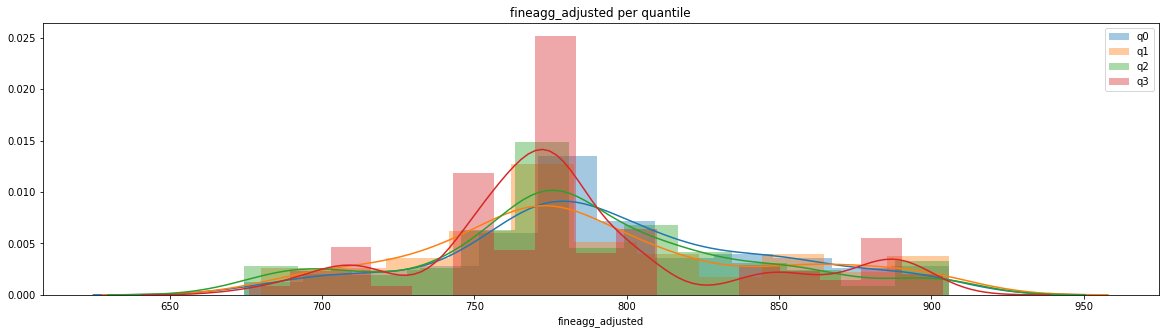

In [27]:
# Distplot for each collumn vs Quantile of Strength
q0 = data.loc[(data['strength_quantile'] == 0)]
q1 = data.loc[(data['strength_quantile'] == 1)]
q2 = data.loc[(data['strength_quantile'] == 2)]
q3 = data.loc[(data['strength_quantile'] == 3)]

for x, y in enumerate(data):
    plt.figure(figsize=(20,5))
    sns.distplot(q0[y]) #blue
    sns.distplot(q1[y]) #orange
    sns.distplot(q2[y]) #green
    sns.distplot(q3[y]) #rose   
    plt.legend(labels=['q0','q1','q2','q3'])
    plt.title(y + ' per quantile')
    plt.show()

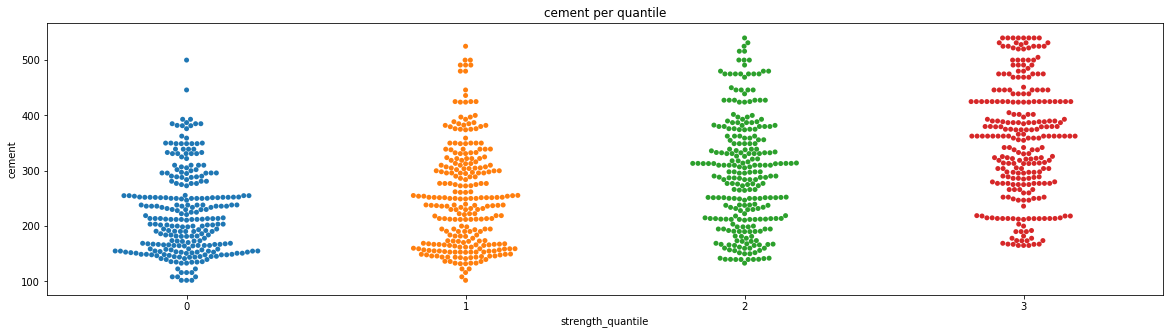

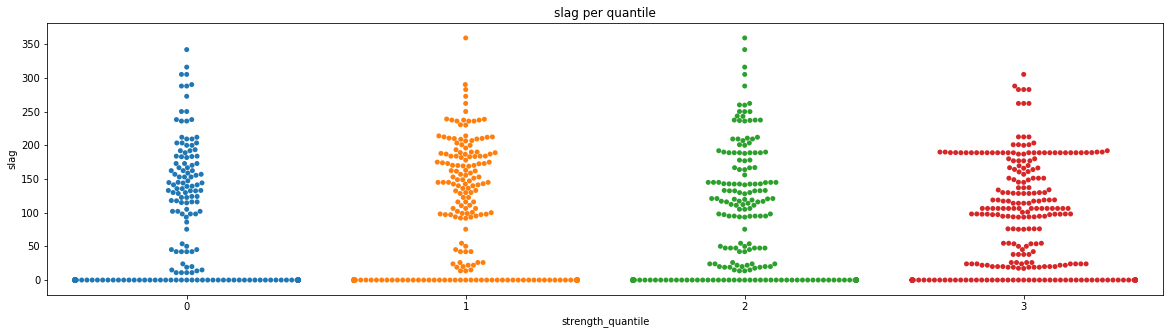

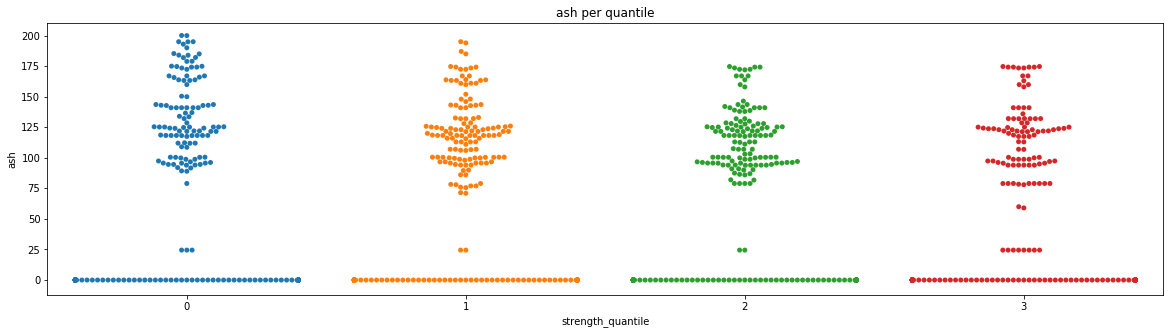

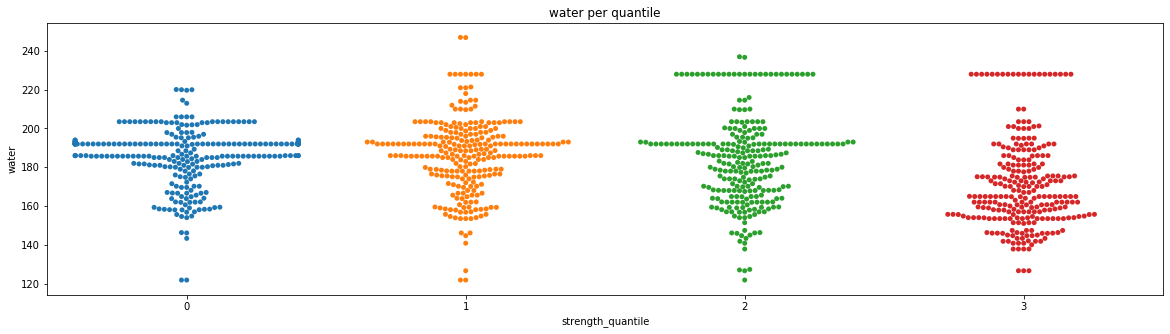

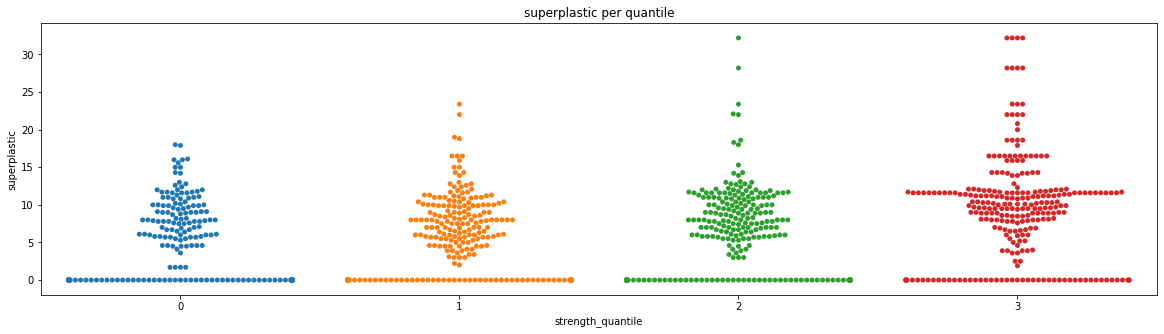

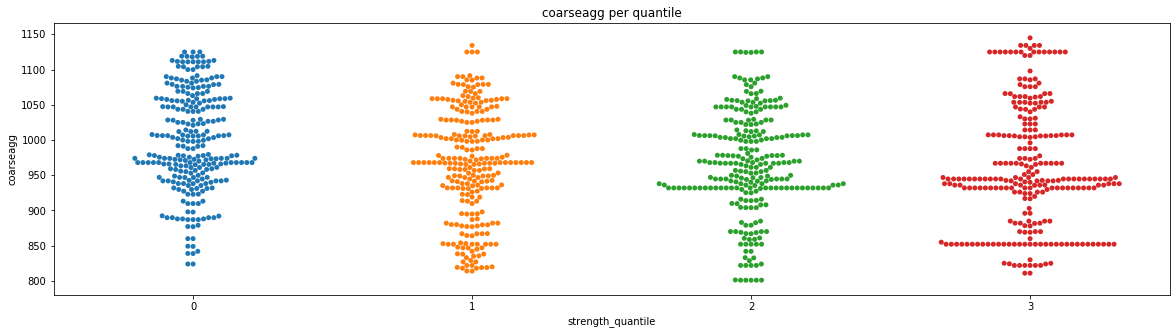

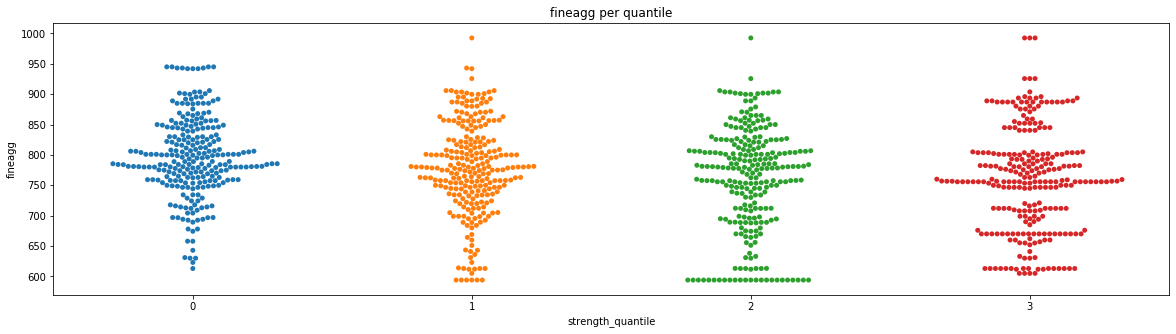

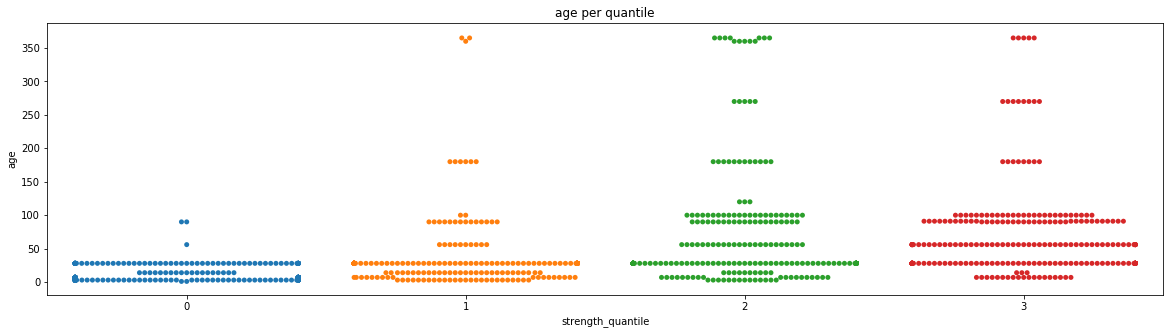

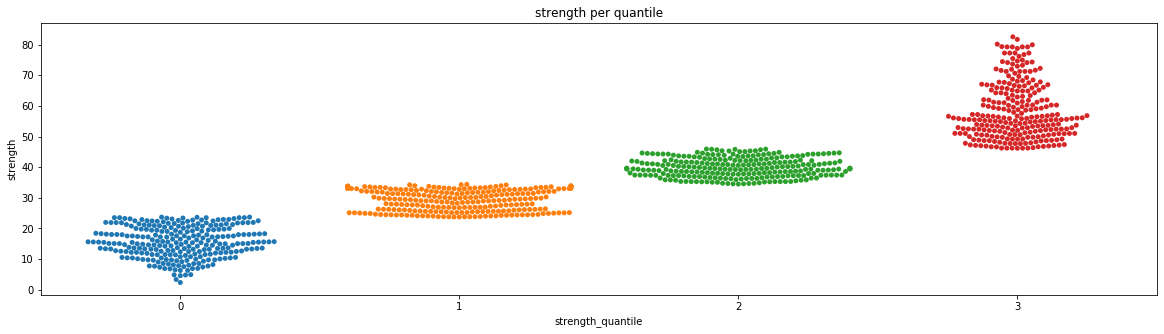

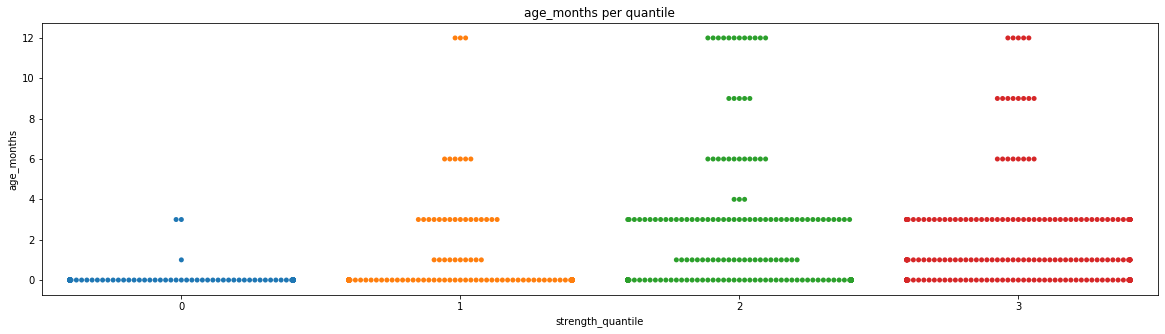

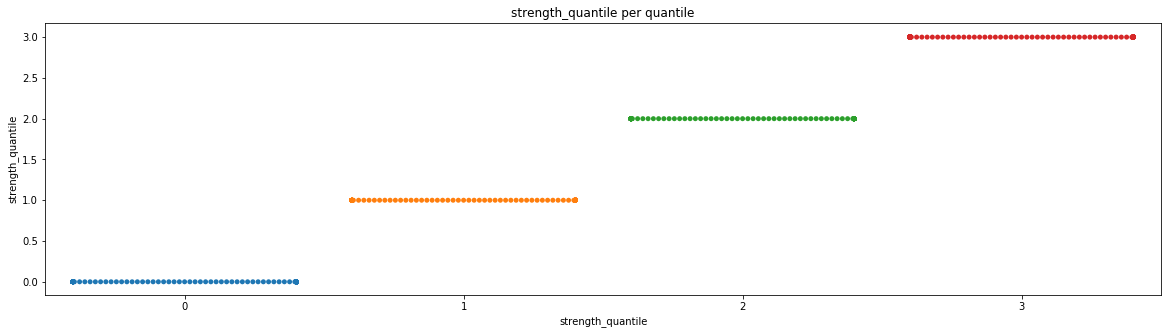

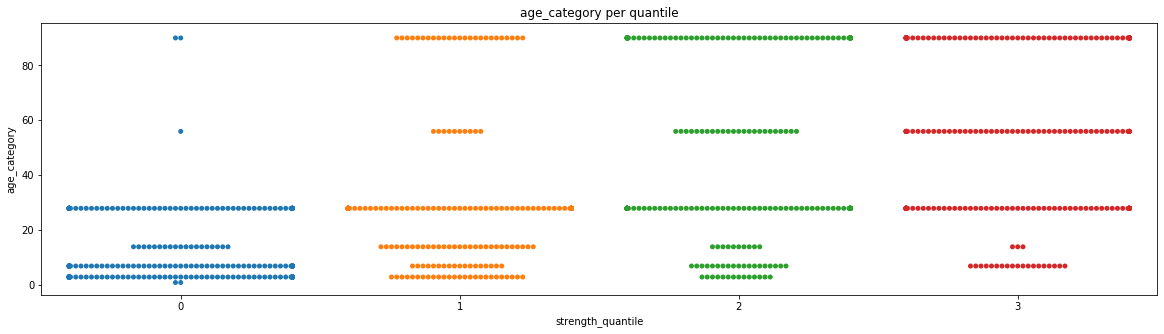

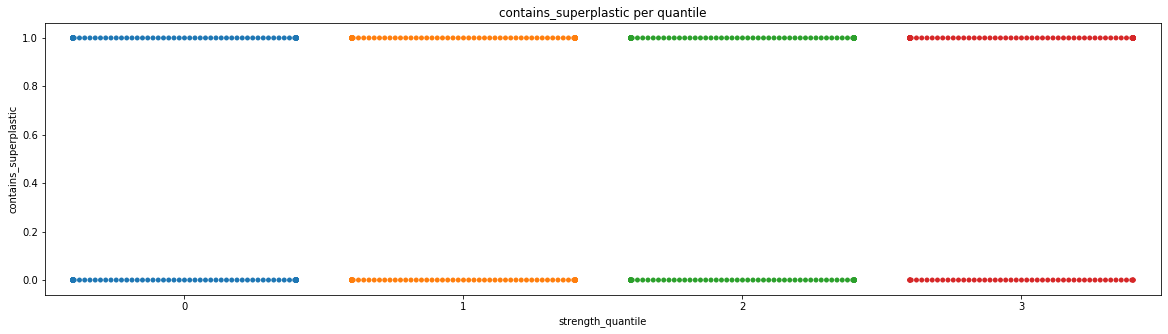

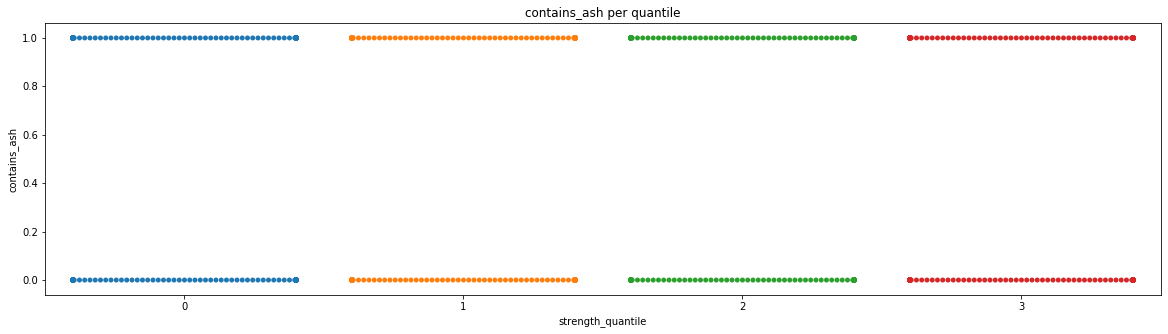

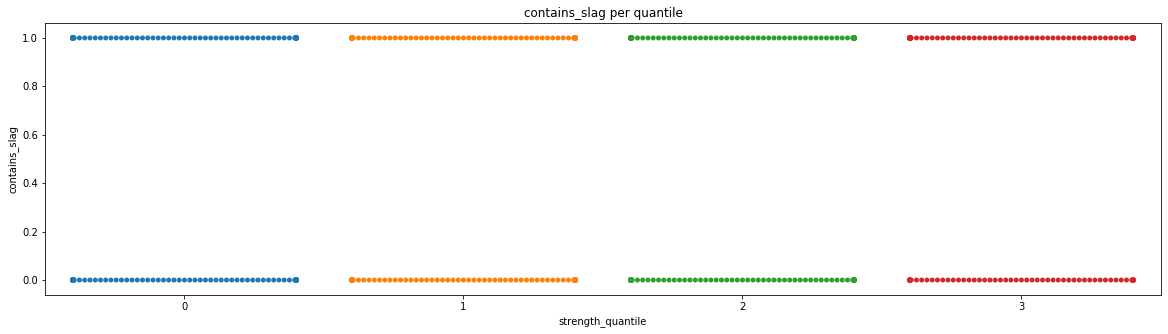

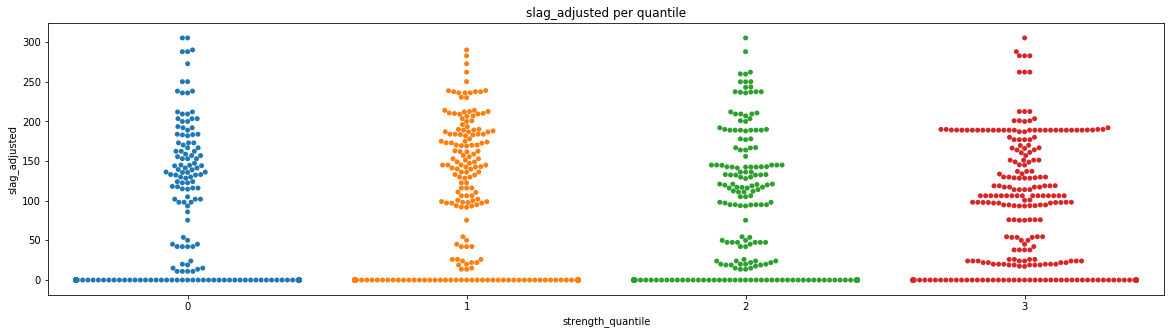

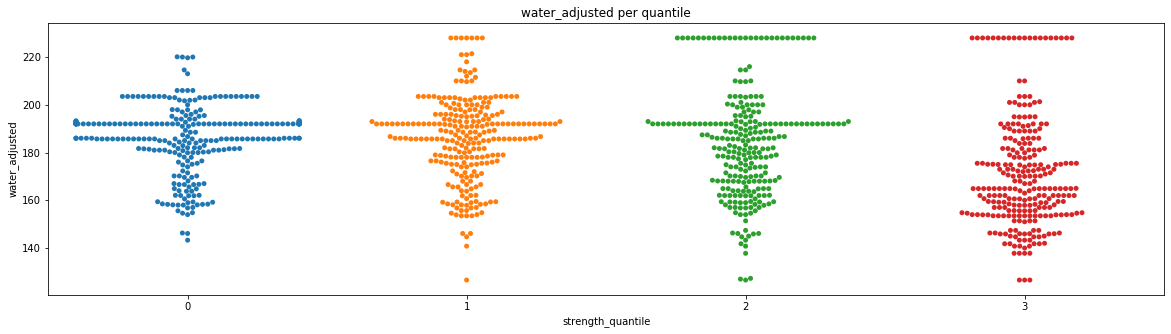

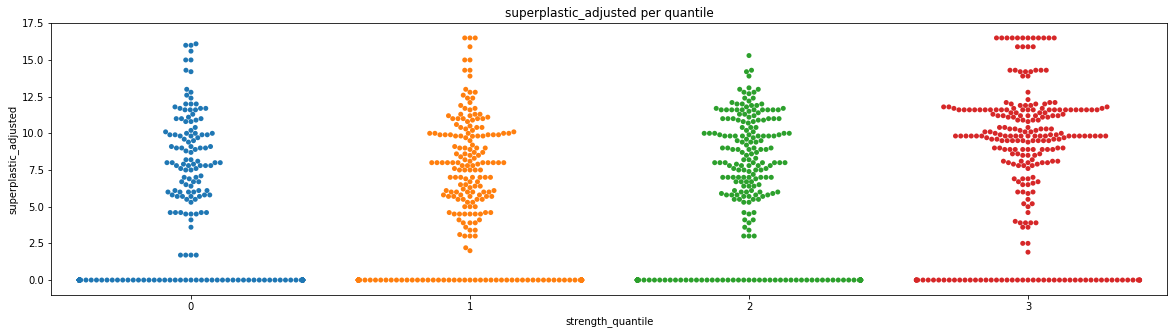

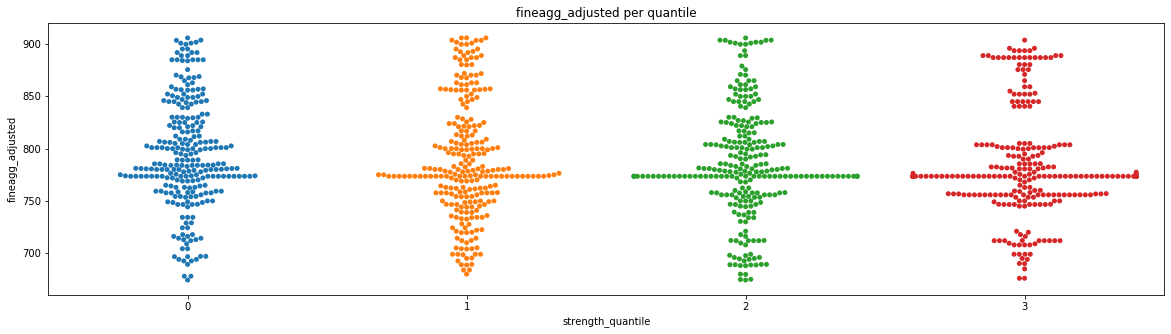

In [28]:
# Swarm for each collumn vs Quantile of Strength

for a, b in enumerate(data):
    plt.figure(figsize=(20,5))
    sns.swarmplot(y= data[b], x= data['strength_quantile']) 
    plt.title(b + ' per quantile')
    plt.show()

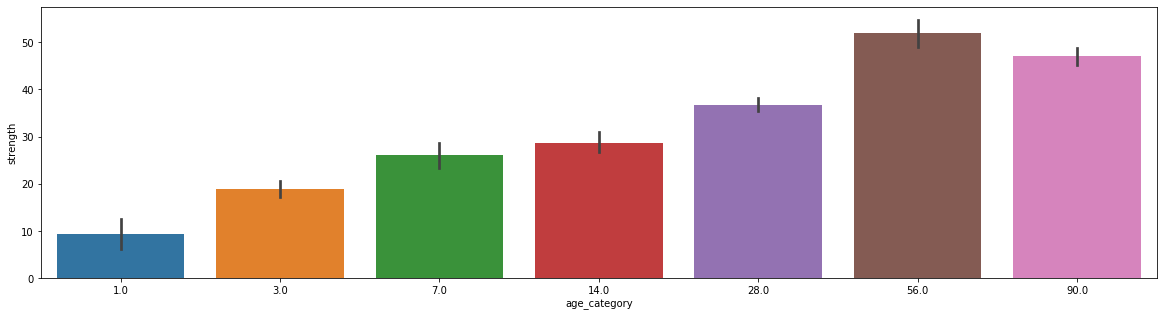

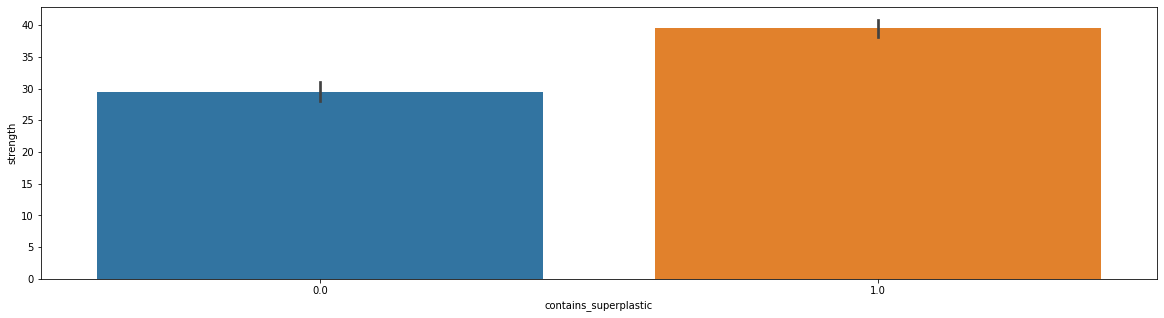

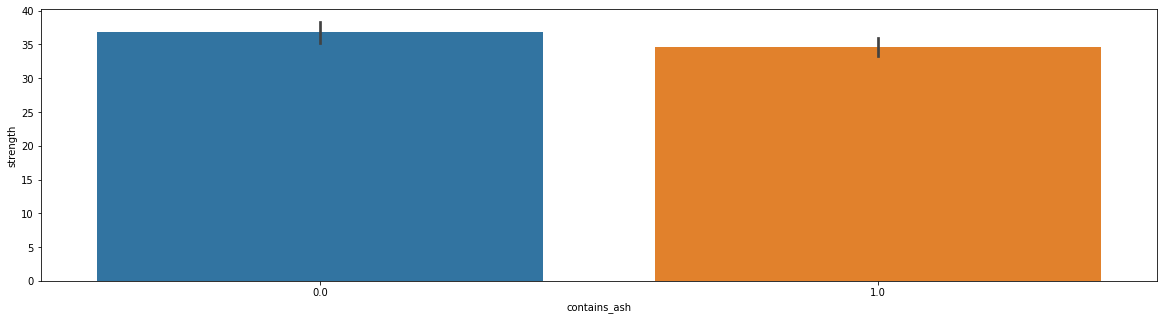

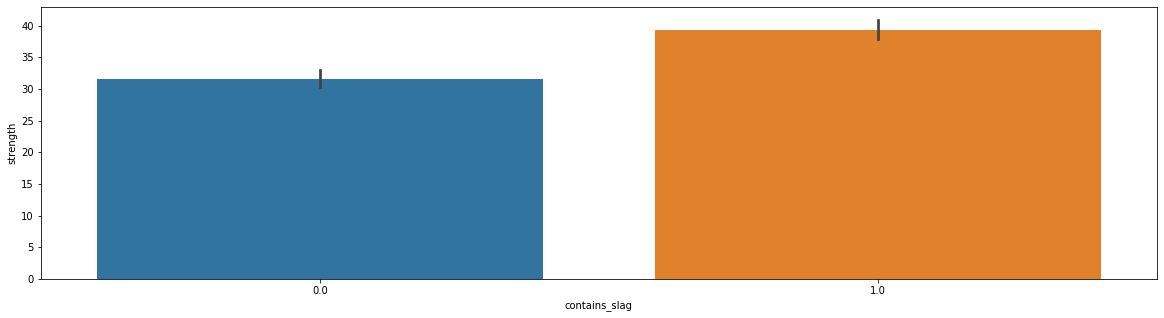

In [29]:
# Categorical Variables
Cat_Vars = ['age_category','contains_superplastic','contains_ash','contains_slag']

#ax = sns.barplot(x="age_category", y="strength", data=data)
#ax.set(ylabel="Percent")

# Countplot
for x, y in enumerate(Cat_Vars):
    plt.figure(figsize=(20,5))
    sns.barplot(x= data[y],  y="strength", data= data)
    plt.show()

<Figure size 2160x720 with 0 Axes>

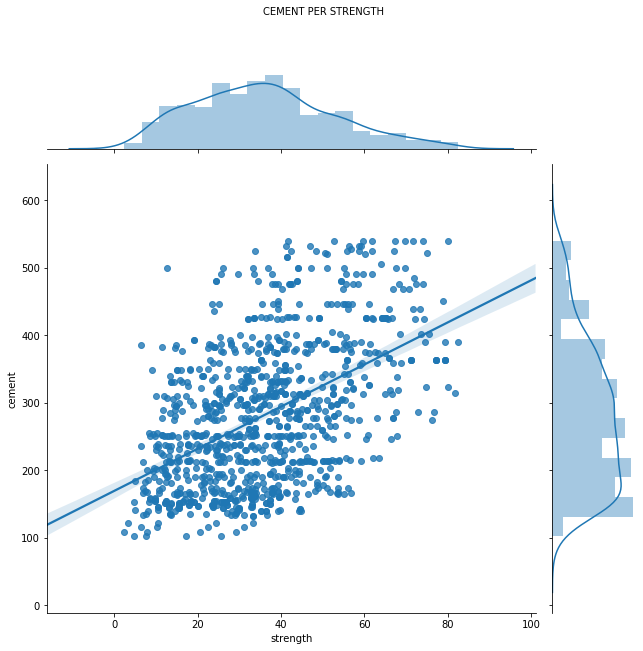

<Figure size 2160x720 with 0 Axes>

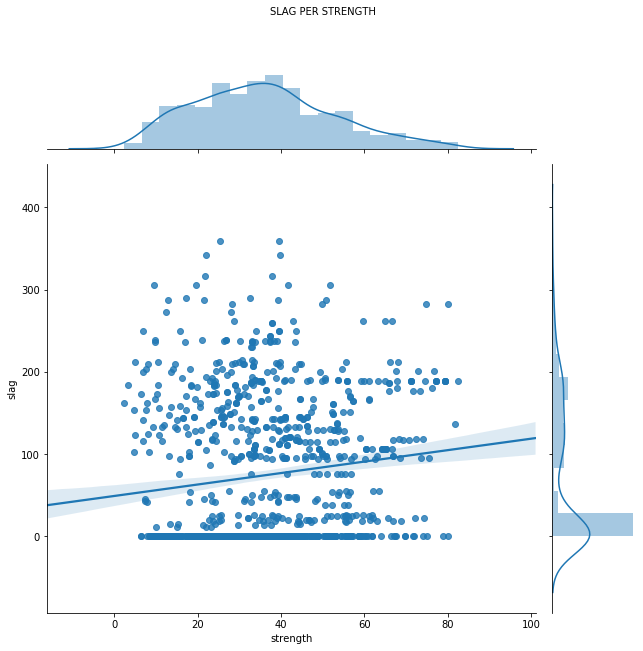

<Figure size 2160x720 with 0 Axes>

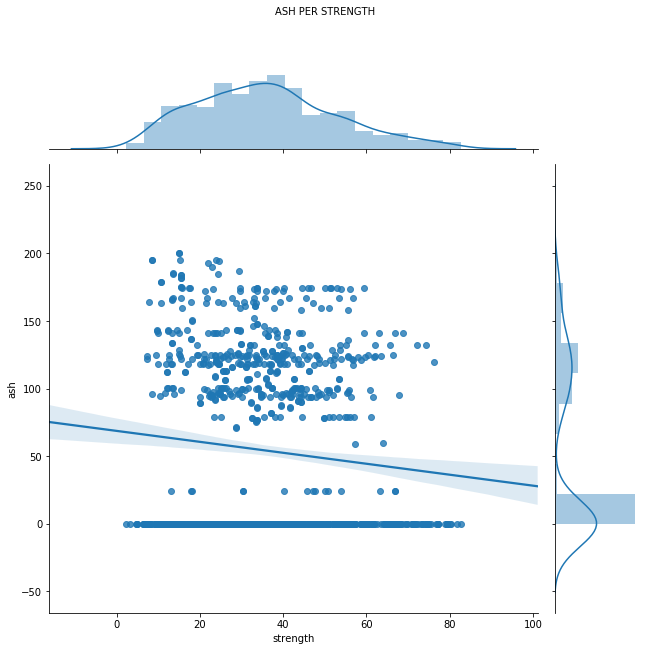

<Figure size 2160x720 with 0 Axes>

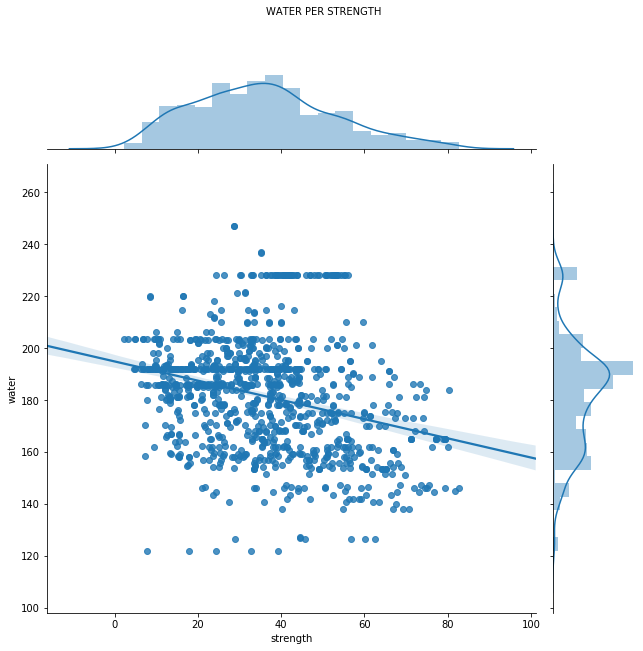

<Figure size 2160x720 with 0 Axes>

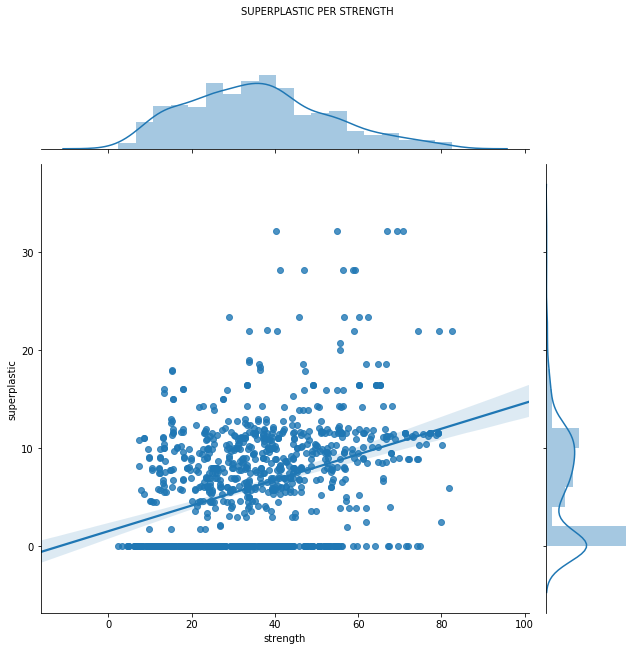

<Figure size 2160x720 with 0 Axes>

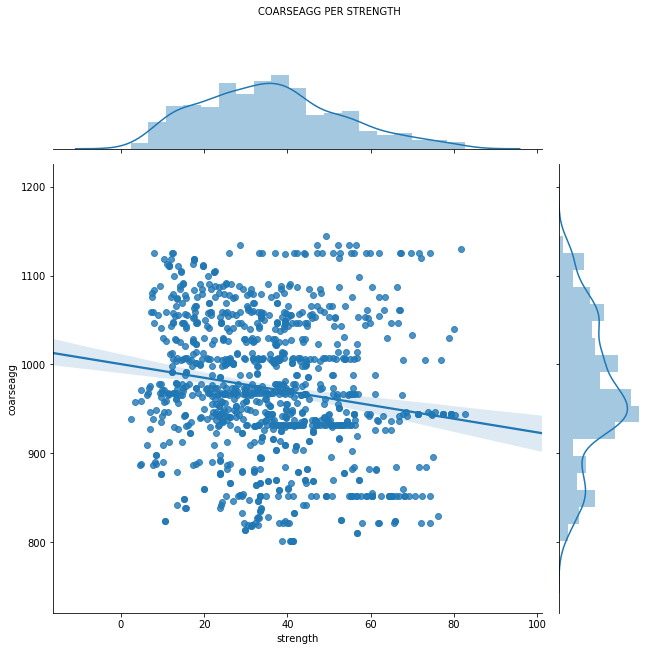

<Figure size 2160x720 with 0 Axes>

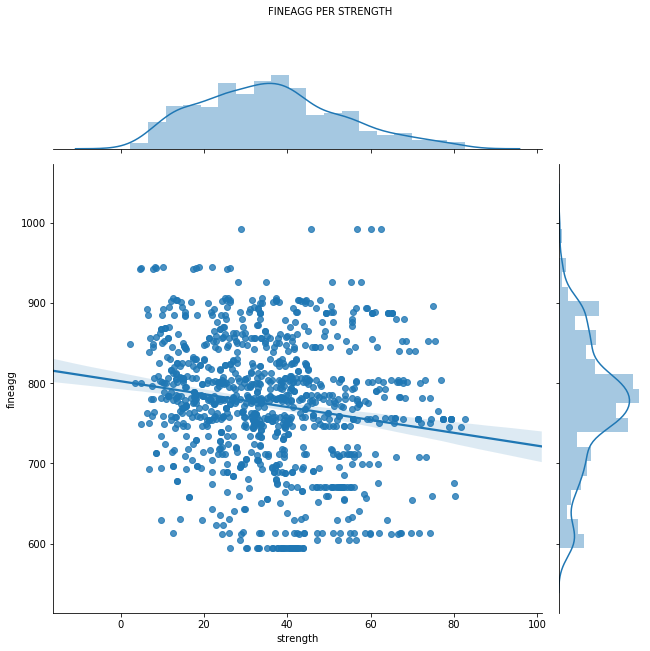

<Figure size 2160x720 with 0 Axes>

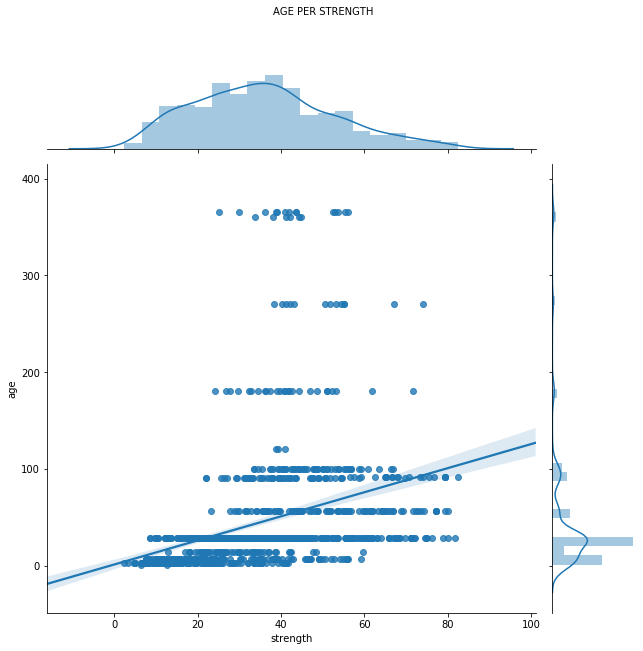

<Figure size 2160x720 with 0 Axes>

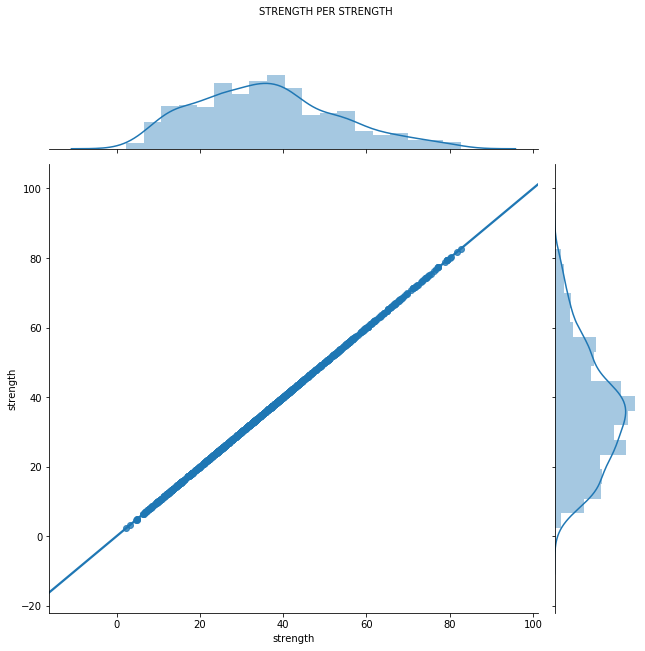

<Figure size 2160x720 with 0 Axes>

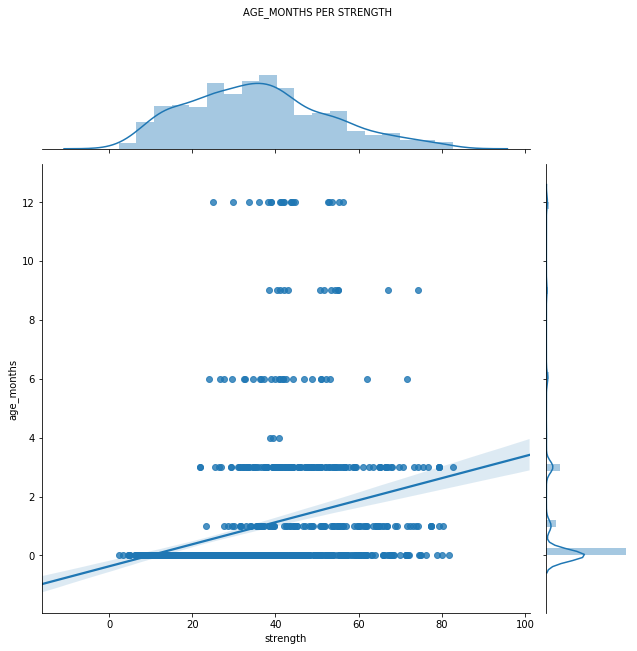

<Figure size 2160x720 with 0 Axes>

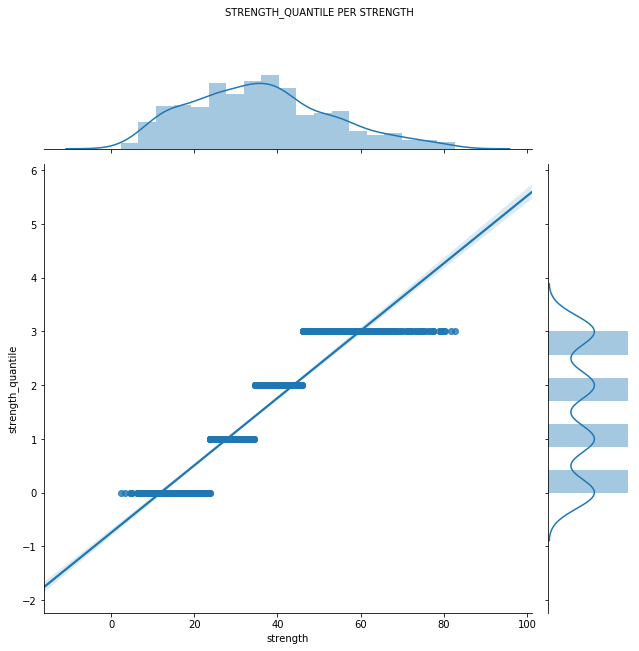

<Figure size 2160x720 with 0 Axes>

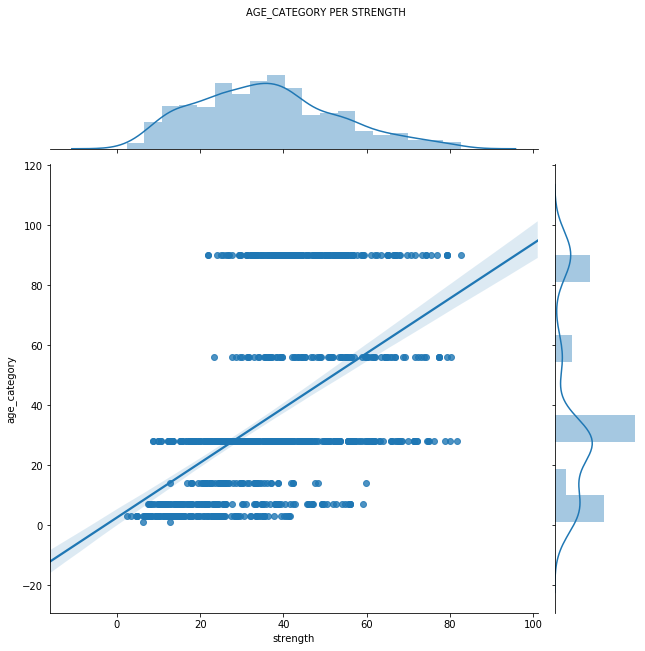

<Figure size 2160x720 with 0 Axes>

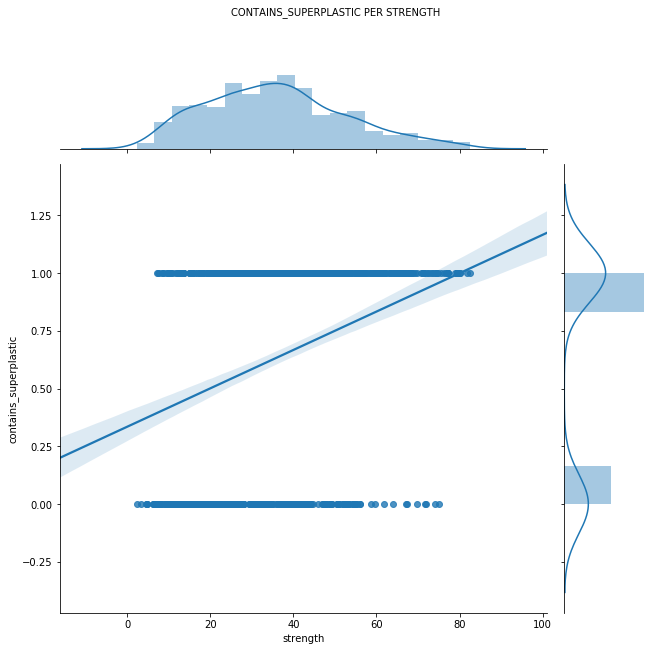

<Figure size 2160x720 with 0 Axes>

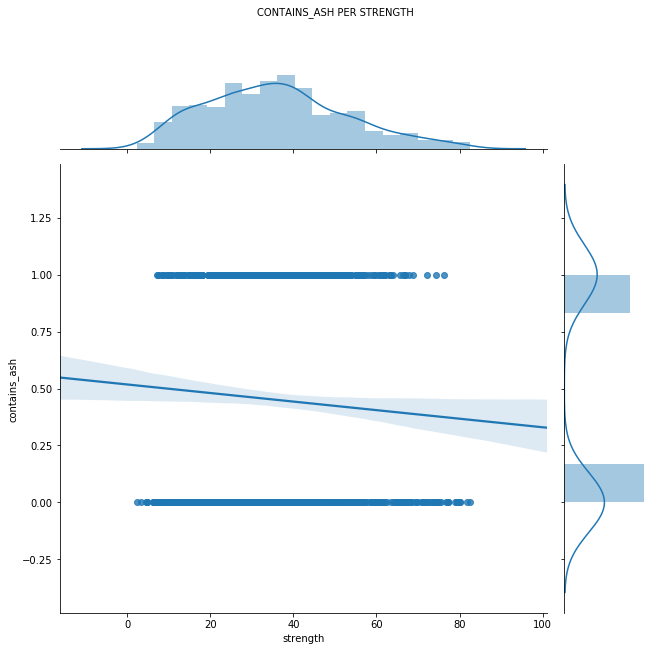

<Figure size 2160x720 with 0 Axes>

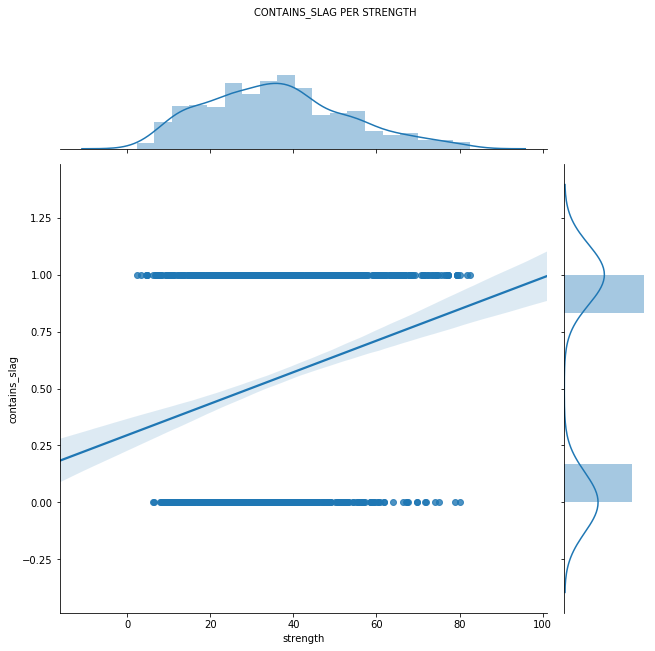

<Figure size 2160x720 with 0 Axes>

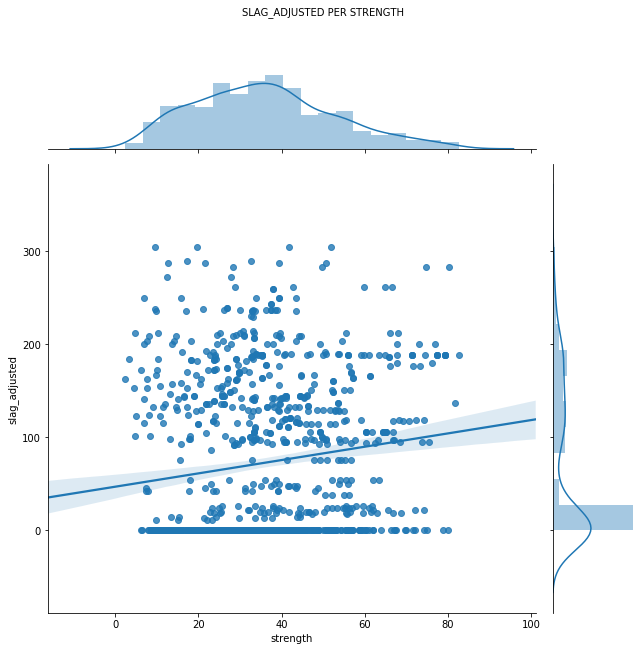

<Figure size 2160x720 with 0 Axes>

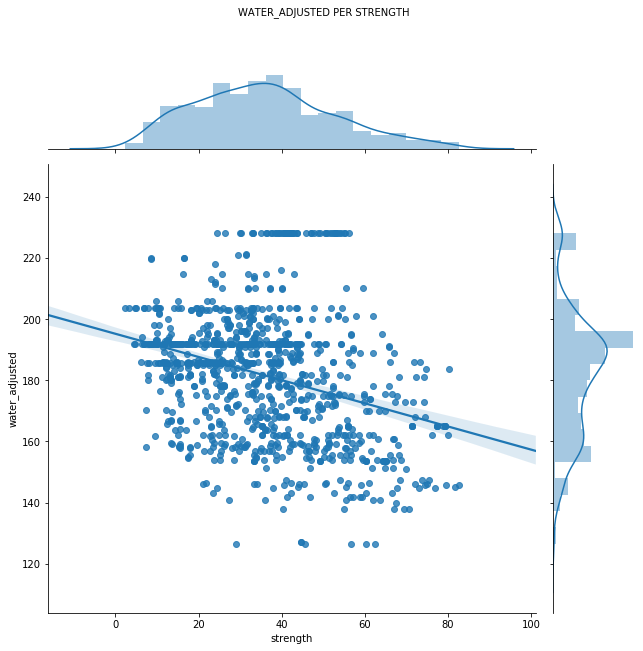

<Figure size 2160x720 with 0 Axes>

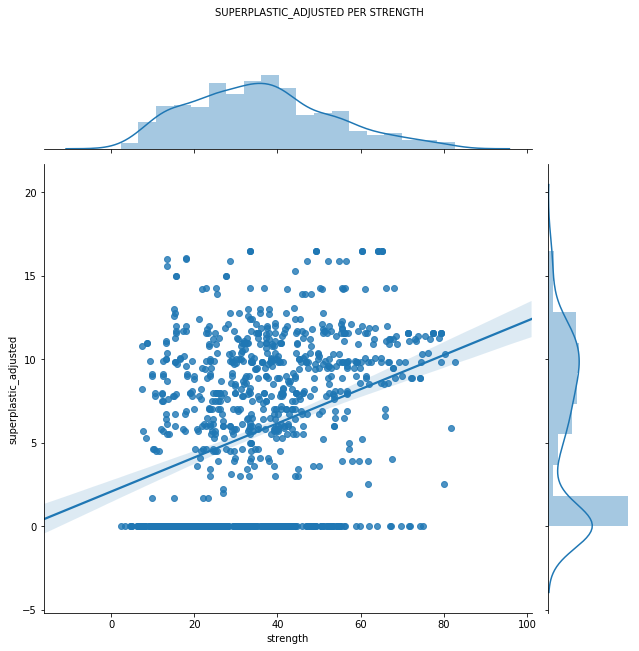

<Figure size 2160x720 with 0 Axes>

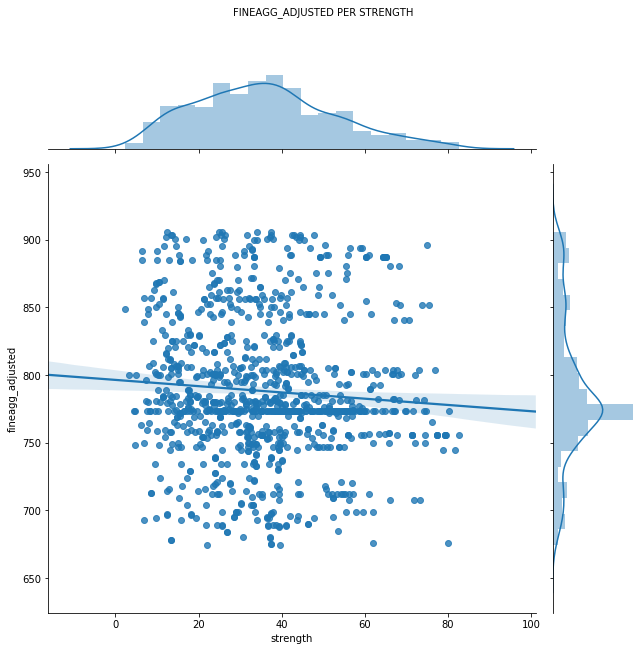

In [30]:
# Jointplot for each collumn vs Strength

for a, b in enumerate(data):
    plt.figure(figsize=(30,10))
    sns.jointplot(x='strength', y=b, data=data,kind="reg", height=9)
    plt.suptitle(str.upper(b + ' per strength'), y=1, fontsize = 10)
    plt.subplots_adjust(top=0.9)
    plt.show()
    
    
    

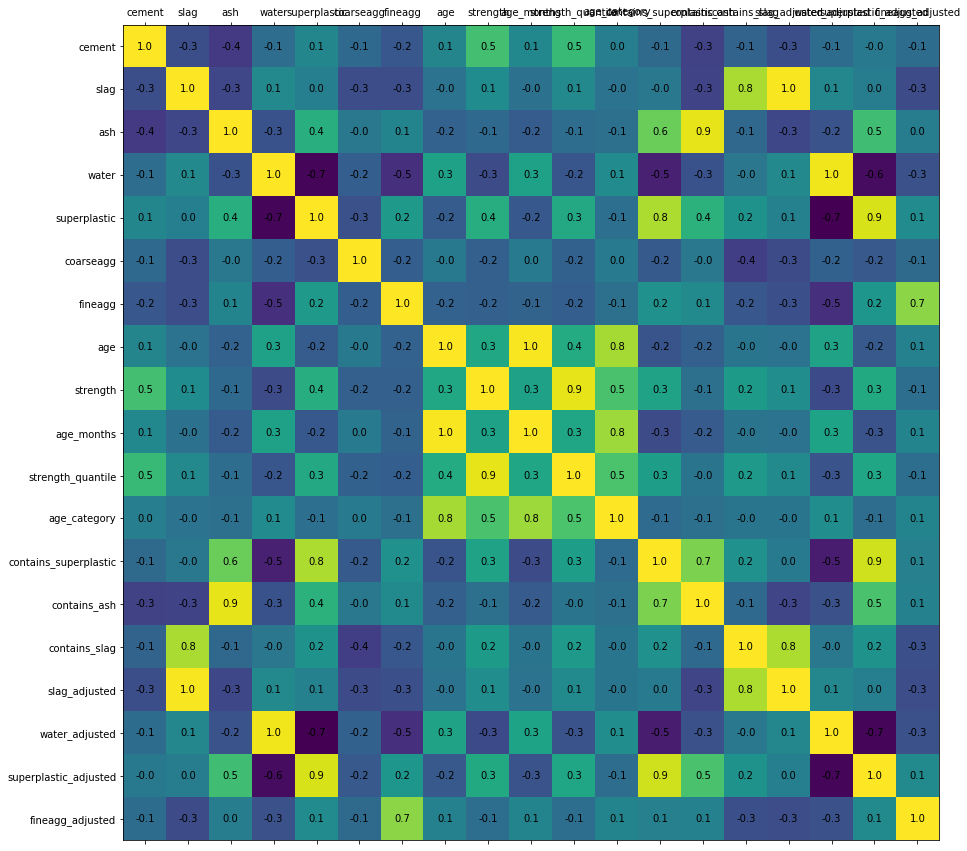

In [31]:
# Graf view of correlation
def plot_correlation(data):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(30, 15))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
        
plot_correlation(data)

In [32]:
corr = data.corr()
print('\n Positive Correlation')
corr >= 0.4


 Positive Correlation


cement   slag    ash  water  superplastic  coarseagg  \
cement                   True  False  False  False         False      False   
slag                    False   True  False  False         False      False   
ash                     False  False   True  False         False      False   
water                   False  False  False   True         False      False   
superplastic            False  False  False  False          True      False   
coarseagg               False  False  False  False         False       True   
fineagg                 False  False  False  False         False      False   
age                     False  False  False  False         False      False   
strength                 True  False  False  False         False      False   
age_months              False  False  False  False         False      False   
strength_quantile        True  False  False  False         False      False   
age_category            False  False  False  False         False      False   
contains_superplastic   False  False   True  False          True      False   
contains_ash            False  False   True  False         False      False   
contains_slag           False   True  False  False         False      False   
slag_adjusted           False   True  False  False         False      False   
water_adjusted          False  False  False   True         False      False   
superplastic_adjusted   False  False   True  False          True      False   
fineagg_adjusted        False  False  False  False         False      False   

                       fineagg    age  strength  age_months  \
cement                   False  False      True       False   
slag                     False  False     False       False   
ash                      False  False     False       False   
water                    False  False     False       False   
superplastic             False  False     False       False   
coarseagg                False  False     False       False   
fineagg                   True  False     False       False   
age                      False   True     False        True   
strength                 False  False      True       False   
age_months               False   True     False        True   
strength_quantile        False  False      True       False   
age_category             False   True      True        True   
contains_superplastic    False  False     False       False   
contains_ash             False  False     False       False   
contains_slag            False  False     False       False   
slag_adjusted            False  False     False       False   
water_adjusted           False  False     False       False   
superplastic_adjusted    False  False     False       False   
fineagg_adjusted          True  False     False       False   

                       strength_quantile  age_category  contains_superplastic  \
cement                              True         False                  False   
slag                               False         False                  False   
ash                                False         False                   True   
water                              False         False                  False   
superplastic                       False         False                   True   
coarseagg                          False         False                  False   
fineagg                            False         False                  False   
age                                False          True                  False   
strength                            True          True                  False   
age_months                         False          True                  False   
strength_quantile                   True          True                  False   
age_category                        True          True                  False   
contains_superplastic              False         False                   True   
contains_ash                       False       

In [33]:
print('\n Negative Correlation')
corr <= -0.4


 Negative Correlation


cement   slag    ash  water  superplastic  coarseagg  \
cement                  False  False  False  False         False      False   
slag                    False  False  False  False         False      False   
ash                     False  False  False  False         False      False   
water                   False  False  False  False          True      False   
superplastic            False  False  False   True         False      False   
coarseagg               False  False  False  False         False      False   
fineagg                 False  False  False   True         False      False   
age                     False  False  False  False         False      False   
strength                False  False  False  False         False      False   
age_months              False  False  False  False         False      False   
strength_quantile       False  False  False  False         False      False   
age_category            False  False  False  False         False      False   
contains_superplastic   False  False  False   True         False      False   
contains_ash            False  False  False  False         False      False   
contains_slag           False  False  False  False         False      False   
slag_adjusted           False  False  False  False         False      False   
water_adjusted          False  False  False  False          True      False   
superplastic_adjusted   False  False  False   True         False      False   
fineagg_adjusted        False  False  False  False         False      False   

                       fineagg    age  strength  age_months  \
cement                   False  False     False       False   
slag                     False  False     False       False   
ash                      False  False     False       False   
water                     True  False     False       False   
superplastic             False  False     False       False   
coarseagg                False  False     False       False   
fineagg                  False  False     False       False   
age                      False  False     False       False   
strength                 False  False     False       False   
age_months               False  False     False       False   
strength_quantile        False  False     False       False   
age_category             False  False     False       False   
contains_superplastic    False  False     False       False   
contains_ash             False  False     False       False   
contains_slag            False  False     False       False   
slag_adjusted            False  False     False       False   
water_adjusted            True  False     False       False   
superplastic_adjusted    False  False     False       False   
fineagg_adjusted         False  False     False       False   

                       strength_quantile  age_category  contains_superplastic  \
cement                             False         False                  False   
slag                               False         False                  False   
ash                                False         False                  False   
water                              False         False                   True   
superplastic                       False         False                  False   
coarseagg                          False         False                  False   
fineagg                            False         False                  False   
age                                False         False                  False   
strength                           False         False                  False   
age_months                         False         False                  False   
strength_quantile                  False         False                  False   
age_category                       False         False                  False   
contains_superplastic              False         False                  False   
contains_ash                       False       

<span style="font-family: Verdana;font-size:1.2em;color:#B22222;">  Bivariate Data Analysis - Correlation Analysis 

       To better understand the data correlation from each collumn to target, i've made a quantile.
   
       Seeing the density and swarm graphs, we can assume that:
       We have more ciment on more strength
       We have less water on more strength
       We have less fineagg on more strength
       We have less ash on more strength
       Superplastic increases strength
       Slag increases strength
       Coarseagg reduces strength
       Older mixes are strength than younger until 56 days. After this period it reduces strength
       Superplastic and fineagg is negative correlated to water
       
   
   
   

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
### 3 - Feature Engineering techniques

<span style="font-family: Verdana;font-size:1em;color:#E41414;"> Data analysis focused on extract value from data

---------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Opportunities identified with Data
##### NEW COLLUMNS CREATED ON LAST STEPS:

    - age_months : Created to group age from days to months
    - strength_quantile: Quantile from Strength information to analysis
    - age_category: Created from Days (int) to Categorical Variable
    - contains_superplastic : Contains or not superplastic
    - contains_ash : Contains or not ash
    - contains_slag : Contains or not slag


In [34]:
#create a int variable for target
data['strength_categorical'] =  pd.qcut(data['strength'],30, labels=False)

data['strength'] = data['strength'].astype('float64')
data.dtypes

cement                   float64
slag                     float64
ash                      float64
water                    float64
superplastic             float64
coarseagg                float64
fineagg                  float64
age                        int64
strength                 float64
age_months               float64
strength_quantile          int64
age_category             float64
contains_superplastic    float64
contains_ash             float64
contains_slag            float64
slag_adjusted            float64
water_adjusted           float64
superplastic_adjusted    float64
fineagg_adjusted         float64
strength_categorical       int64
dtype: object

In [35]:
data.groupby(by=['strength_categorical'])['strength'].agg(['mean', 'count','min','max']).sort_values(by='mean')

mean  count   min   max
strength_categorical                         
0                     7.38     35  2.33  9.73
1                    11.00     34  9.74 12.25
2                    13.21     35 12.37 14.20
3                    15.11     34 14.31 15.69
4                    17.22     34 15.75 18.03
5                    19.50     34 18.13 20.92
6                    21.88     35 20.97 22.84
7                    23.64     34 22.90 24.24
8                    24.83     34 24.28 25.46
9                    26.19     35 25.48 26.97
10                   28.13     34 27.04 29.07
11                   29.93     34 29.16 30.88
12                   31.59     34 30.96 32.11
13                   32.86     35 32.24 33.31
14                   33.71     34 33.36 34.40
15                   35.41     35 34.49 36.35
16                   37.07     34 36.44 37.68
17                   38.34     34 37.72 39.00
18                   39.47     35 39.05 40.06
19                   40.81     34 40.15 41.37
20                   42.19     34 41.41 43.25
21                   44.03     35 43.38 44.61
22                   46.01     33 44.64 47.22
23                   48.88     35 47.28 50.51
24                   51.63     34 50.53 52.82
25                   54.17     34 52.83 55.51
26                   56.68     35 55.55 58.80
27                   61.33     36 59.00 64.30
28                   67.05     32 64.90 70.70
29                   75.70     35 71.30 82.60

In [36]:
data.head(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0  141.30 212.00   0.00 203.50          0.00     971.80   748.50   28   
1  168.90  42.20 124.30 158.30         10.80   1,080.80   796.20   14   
2  250.00   0.00  95.70 187.40          5.50     956.90   861.20   28   
3  266.00 114.00   0.00 228.00          0.00     932.00   670.00   28   
4  154.80 183.40   0.00 193.30          9.10   1,047.40   696.70   28   
5  255.00   0.00   0.00 192.00          0.00     889.80   945.00   90   
6  166.80 250.20   0.00 203.50          0.00     975.60   692.60    7   
7  251.40   0.00 118.30 188.50          6.40   1,028.40   757.70   56   
8  296.00   0.00   0.00 192.00          0.00   1,085.00   765.00   28   
9  155.00 184.00 143.00 194.00          9.00     880.00   699.00   28   

   strength  age_months  strength_quantile  age_category  \
0     29.89        0.00                  1         28.00   
1     23.51        0.00                  0         14.00   
2     29.22        0.00                  1         28.00   
3     45.85        0.00                  2         28.00   
4     18.29        0.00                  0         28.00   
5     21.86        3.00                  0         90.00   
6     15.75        0.00                  0          7.00   
7     36.64        1.00                  2         56.00   
8     21.65        0.00                  0         28.00   
9     28.99        0.00                  1         28.00   

   contains_superplastic  contains_ash  contains_slag  slag_adjusted  \
0                   0.00          0.00           1.00         212.00   
1                   1.00          1.00           1.00          42.20   
2                   1.00          1.00           0.00           0.00   
3                   0.00          0.00           1.00         114.00   
4                   1.00          0.00           1.00         183.40   
5                   0.00          0.00           0.00           0.00   
6                   0.00          0.00           1.00         250.20   
7                   1.00          1.00           0.00           0.00   
8                   0.00          0.00           0.00           0.00   
9                   1.00          1.00           1.00         184.00   

   water_adjusted  superplastic_adjusted  fineagg_adjusted  \
0          203.50                   0.00            748.50   
1          158.30                  10.80            796.20   
2          187.40                   5.50            861.20   
3          228.00                   0.00            773.58   
4          193.30                   9.10            696.70   
5          192.00                   0.00            773.58   
6          203.50                   0.00            692.60   
7          188.50                   6.40            757.70   
8          192.00                   0.00            765.00   
9          194.00                   9.00            699.00   

   strength_categorical  
0                    11  
1                     7  
2                    11  
3                    22  
4                     5  
5                     6  
6                     4  
7                    16  
8                     6  
9                    10

In [37]:
#SCALE DATA

data_scaled = data.copy()

scaler = StandardScaler()
cols_to_scale = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength','slag_adjusted','water_adjusted','superplastic_adjusted','fineagg_adjusted']

data_scaled[cols_to_scale] = scaler.fit_transform(data_scaled[cols_to_scale].to_numpy())
data_scaled.head()

X_scaled = data_scaled.drop(columns= ['strength','strength_quantile','strength_categorical'])  # Separating the target and same variables from the others

y_scaled = data_scaled.strength
lab_enc = preprocessing.LabelEncoder()
y_scaled = lab_enc.fit_transform(y_scaled)



In [38]:
X = data.drop(columns= ['strength','strength_quantile','strength_categorical'])  # Separating the target and same variables from the others

y = data.strength
lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)



In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=22)
print(X_train.shape, X_test.shape)


(721, 17) (309, 17)


In [40]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test) 
lr.score(X_test, y_test)

LR_Score_training = lr.score(X_train, y_train)
LR_Score_test = lr.score(X_test, y_test)

print('Training accuracy on Logistic Regression: %.3f' % LR_Score_training)
print('Testing accuracy on Logistic Regression: %.3f' % LR_Score_test)


Training accuracy on Logistic Regression: 0.820
Testing accuracy on Logistic Regression: 0.097


In [41]:
#Cross validation
cv_LR = cross_val_score(lr, X, y, cv = 5).mean()
print(f'Cross validation score of Logistic Regression = %.3f'% cv_LR)

Cross validation score of Logistic Regression = 0.296


In [43]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

pred = LinReg.predict(X_test)
LinReg.score(X_test, y_test)

LinReg_Score_training = LinReg.score(X_train, y_train)
LinReg_Score_test = LinReg.score(X_test, y_test)

print('Training accuracy on Linear Regression: %.3f' % LinReg_Score_training)
print('Testing accuracy on Linear Regression: %.3f' % LinReg_Score_test)

Training accuracy on Linear Regression: 0.825
Testing accuracy on Linear Regression: 0.841


In [44]:
# Build Linear Regression to feature selection
linR = LinearRegression()
# Build step forward feature selection
stepfw = sfs(linR, k_features=13, forward=True, scoring='r2', cv=5)
# Perform SFFS
stepfw = stepfw.fit(X_train, y_train)
stepfw.get_metric_dict()

{1: {'feature_idx': (9,),
  'cv_scores': array([0.28652508, 0.27913703, 0.23143637, 0.26454287, 0.21240964]),
  'avg_score': 0.2548101968557189,
  'feature_names': ('age_category',),
  'ci_bound': 0.03651898849851562,
  'std_dev': 0.028413013721911577,
  'std_err': 0.014206506860955787},
 2: {'feature_idx': (0, 9),
  'cv_scores': array([0.44904942, 0.53476206, 0.4431049 , 0.41867534, 0.4851648 ]),
  'avg_score': 0.4661513037112771,
  'feature_names': ('cement', 'age_category'),
  'ci_bound': 0.051880327476508246,
  'std_dev': 0.04036465732196311,
  'std_err': 0.02018232866098155},
 3: {'feature_idx': (0, 9, 10),
  'cv_scores': array([0.62165569, 0.63268738, 0.59959169, 0.58523344, 0.65621582]),
  'avg_score': 0.6190768049973666,
  'feature_names': ('cement', 'age_category', 'contains_superplastic'),
  'ci_bound': 0.03198411239923693,
  'std_dev': 0.02488472605202686,
  'std_err': 0.01244236302601343},
 4: {'feature_idx': (0, 1, 9, 10),
  'cv_scores': array([0.68529734, 0.71100876, 0.73

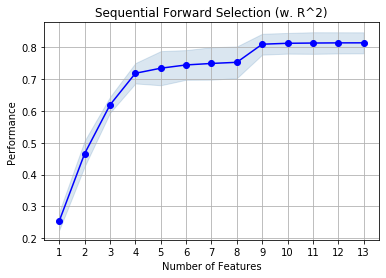


 With 13 Fowards we have the best R^2 score


In [45]:
fig = plot_sfs(stepfw.get_metric_dict())
plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()
print('\n With 13 Fowards we have the best R^2 score')

In [46]:
# Best Features 
columnList = list(X_train.columns)
feat_cols = list(stepfw.k_feature_idx_)
subsetColumnList = [columnList[i] for i in feat_cols] 
print('The most relevant features: ',subsetColumnList)

The most relevant features:  ['cement', 'slag', 'ash', 'superplastic', 'age', 'age_months', 'age_category', 'contains_superplastic', 'contains_ash', 'contains_slag', 'slag_adjusted', 'water_adjusted', 'fineagg_adjusted']


In [47]:
linR = LinearRegression()
linR.fit(X_train[subsetColumnList], y_train)
y_train_pred = linR.predict(X_train[subsetColumnList])
y_test_pred = linR.predict(X_test[subsetColumnList])

linR_SFW_score_training = linR.score(X_train[subsetColumnList], y_train)
linR_SFW_score_test =linR.score(X_test[subsetColumnList], y_test)

print('Training accuracy on StepFoward selected features for Linear Regression: %.3f' % linR_SFW_score_training)
print('Testing accuracy on StepFoward selected features for Linear Regression: %.3f' % linR_SFW_score_test)

Training accuracy on StepFoward selected features for Linear Regression: 0.825
Testing accuracy on StepFoward selected features for Linear Regression: 0.840


In [48]:
#Cross validation for Decision Tree dt
cv_linR = cross_val_score(linR, X, y, cv = 5).mean()
print(f'Cross validation score of Decision tree = %.3f'% cv_linR)

Cross validation score of Decision tree = 0.822


In [49]:
linR = LinearRegression()
linR.fit(X_train, y_train)
y_train_pred = linR.predict(X_train)
y_test_pred = linR.predict(X_test)

print('For comparison, Training accuracy on all features: %.3f' % linR.score(X_train, y_train))
print('For comparison, Testing accuracy on all features: %.3f' % linR.score(X_test, y_test))

For comparison, Training accuracy on all features: 0.825
For comparison, Testing accuracy on all features: 0.841


In [50]:
# Kfold Cross Validation for Linear Regression with selected features
seed = 5
splits = 10

kfold = model_selection.KFold(n_splits=splits,random_state=seed)

model = LinearRegression()
results = model_selection.cross_val_score(model, X[subsetColumnList], y, cv=kfold, scoring='r2')
kfold_LinearRegressionSelected = results.mean()

print('Kfold Cross Validation Score for Linear Regression with Selected Features: %.3f' % kfold_LinearRegressionSelected)

#Cross validation 
cv_LinReg_Selected = cross_val_score(model, X, y, cv = 5).mean()
print(f'Cross validation score of Linear Regression with Selected Features = %.3f'% cv_LinReg_Selected)

kfold = model_selection.KFold(n_splits=splits,random_state=seed)

model = LinearRegression()
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='r2')
kfold_LinearRegressionALL = results.mean()

print('\nKFold Cross Validation Score for Linear Regression with ALL Features: %.3f' % kfold_LinearRegressionALL)

#Cross validation 
cv_LinReg_All = cross_val_score(model, X, y, cv = 5).mean()
print(f'Cross validation score of Linear Regression with all Features = %.3f'% cv_LinReg_All)


Kfold Cross Validation Score for Linear Regression with Selected Features: 0.820
Cross validation score of Linear Regression with Selected Features = 0.822

KFold Cross Validation Score for Linear Regression with ALL Features: 0.819
Cross validation score of Linear Regression with all Features = 0.822


### DECISION ON MODEL TO PREDICT DATA

        - Considering the number of parameters, complexity of data and meaningfull categorical variables, 
          its better to implement a complex model, not a linear one.
          
        - Its better to use a quadratic or higher degree model because there are no linear Data in collumns. 
          Multiple densisties, weak correlations, skewed data, etc.
          
         - Scores for this kind of model (linear) are high. May have opportunities to be incresed with tunning.
         
         - The most relevant features:  'cement', 'slag', 'ash', 'superplastic', 'age', 'age_months', 'age_category', 'contains_superplastic', 'contains_ash', 'slag_adjusted', 'water_adjusted', 'fineagg_adjusted', 'contains_slag'.
         - Using this set of features, model performance is increased by 0.01
         - This model is stable, using Kfold cross validation.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
### 4 - Creating the model and tuning it

<span style="font-family: Verdana;font-size:1em;color:#E41414;">  Suitable algorithms  for this project.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Decision Tree

In [51]:
#Build Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dtscore = dt.score(X_test, y_test)
pred = dt.predict(X_test)


DT_score_training = dt.score(X_train, y_train)
DT_score_test = dt.score(X_test, y_test)

print('Decision tree acccuracy score: %.3f' % DT_score_training)
print('Decision tree acccuracy score: %.3f' % DT_score_test)

Decision tree acccuracy score: 0.988
Decision tree acccuracy score: 0.128


In [52]:
#Cross validation for Decision Tree dt
cv_dt = cross_val_score(dt, X, y, cv = 5).mean()
print(f'Cross validation score of Decision tree = %.3f'% cv_dt)

Cross validation score of Decision tree = 0.541


In [53]:
# Kfold Cross Validation 
seed = 5
splits = 10

kfold = model_selection.KFold(n_splits=splits,random_state=seed)

results = model_selection.cross_val_score(dt, X, y, cv=kfold, scoring='r2')
kfold_DT = results.mean()

print('Cross Validation Score for Decision Tree: %.3f' % kfold_DT)


Cross Validation Score for Decision Tree: 0.676


## Random Forest

In [54]:
rf = RandomForestClassifier(criterion = 'entropy',  max_depth = 7, min_samples_leaf=5)

rf.fit(X_train, y_train)

rf_score_training = rf.score(X_train, y_train)
rf_score_test = rf.score(X_test, y_test)

print('Random Forest acccuracy score: %.3f' % rf_score_training)
print('Random Forest acccuracy score: %.3f' % rf_score_test)


Random Forest acccuracy score: 0.483
Random Forest acccuracy score: 0.081


In [55]:
#Cross validation Random Forest rf
cv_rf = cross_val_score(rf, X, y, cv = 5).mean()
print('Cross Validation Score of Random forest: %.3f' % cv_rf)


Cross Validation Score of Random forest: 0.393


## Bagging Classifier

In [56]:
#Build Bagging Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

dTreeR = DecisionTreeClassifier(criterion = 'gini',  random_state=1, max_depth = 5) 
dTreeR.fit(X_train, y_train)

bgcl = BaggingClassifier(base_estimator=dTreeR, n_estimators=100,random_state=1, max_samples= .3, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)

y_predict = bgcl.predict(X_test)

bgcl_score_training = bgcl.score(X_train, y_train)
bgcl_score_test =bgcl.score(X_test, y_test)

print('Training accuracy on Bagging Classifier: %.3f' % bgcl_score_training)
print('Testing accuracy on Bagging Classifier: %.3f' % bgcl_score_test)


Training accuracy on Bagging Classifier: 0.261
Testing accuracy on Bagging Classifier: 0.026


In [57]:
#Cross validation 
bgcl_cv = cross_val_score(bgcl, X, y, cv = 5).mean()
print('Cross Validation Score of Bagging Classifier: %.3f' % bgcl_cv)

Cross Validation Score of Bagging Classifier: 0.115


## GradientBoosting Classifier

In [58]:
#Build GradientBoosting Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

gbcl = GradientBoostingClassifier(n_estimators=5,learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)

y_predict = gbcl.predict(X_test)


gbcl_score_training = gbcl.score(X_train, y_train)
gbcl_score_test =gbcl.score(X_test, y_test)

print('Training accuracy on GradientBoosting Classifier: %.3f' % gbcl_score_training)
print('Testing accuracy on GradientBoosting Classifier: %.3f' % gbcl_score_test)



Training accuracy on GradientBoosting Classifier: 0.915
Testing accuracy on GradientBoosting Classifier: 0.110


In [59]:
#Cross validation 
gbcl_cv = cross_val_score(gbcl, X, y, cv = 5).mean()
print('Cross Validation Score of GradientBoosting Classifier: %.3f' % gbcl_cv)

Cross Validation Score of GradientBoosting Classifier: 0.483


## AdaBoost Classifier

In [60]:
#Build AdaBoost Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = bgcl.fit(X_train, y_train)

y_predict = abcl.predict(X_test)

abcl_score_training = bgcl.score(X_train, y_train)
abcl_score_test =bgcl.score(X_test, y_test)

print('Training accuracy on AdaBoost Classifier: %.3f' % abcl_score_training)
print('Testing accuracy on AdaBoost Classifier: %.3f' % abcl_score_test)


Training accuracy on AdaBoost Classifier: 0.261
Testing accuracy on AdaBoost Classifier: 0.026


In [61]:
#Cross validation 
abcl_cv = cross_val_score(abcl, X, y, cv = 5).mean()
print('Cross Validation Score of AdaBoost Classifier: %.3f' % abcl_cv)

Cross Validation Score of AdaBoost Classifier: 0.115


#### GridSearch in AdaBoost

In [62]:
#Creating a grid of hyperparameters

ada_boost = AdaBoostClassifier()

params = {'n_estimators': [100,200,300],
               'learning_rate': [0.5,1.0],
               'algorithm': ['SAMME','SAMME.R']
              }

gs = GridSearchCV(estimator = ada_boost, param_grid = params, cv = 3, n_jobs = -1)


In [63]:
gs.fit(X_train, y_train)

C:\Users\11388\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.5, 1.0],
                         'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [64]:
gs.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 100}

In [65]:
resultDF = pd.DataFrame(gs.cv_results_['params'])
resultDF['mean_test_score'] = (gs.cv_results_['mean_test_score']*100.00)

##### Dataframe to compare hyperparameters vs score

In [66]:
resultDF.sort_values('mean_test_score',ascending = False)

algorithm  learning_rate  n_estimators  mean_test_score
6    SAMME.R           0.50           100             2.77
7    SAMME.R           0.50           200             2.77
8    SAMME.R           0.50           300             2.77
10   SAMME.R           1.00           200             2.22
11   SAMME.R           1.00           300             1.66
9    SAMME.R           1.00           100             1.53
1      SAMME           0.50           200             1.11
0      SAMME           0.50           100             0.97
2      SAMME           0.50           300             0.97
5      SAMME           1.00           300             0.55
3      SAMME           1.00           100             0.42
4      SAMME           1.00           200             0.42

In [67]:
# MODEL CREATED "WITH" GRIDSEARCH RESULTS

ada_gsparams = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 0.5, n_estimators= 300)
ada_gsparams.fit(X_train[subsetColumnList], y_train)
y_predict = ada_gsparams.predict(X_test[subsetColumnList])

In [68]:
ada_score_gs_test = ada_gsparams.score(X_test[subsetColumnList], y_test)
ada_score_gs_train = ada_gsparams.score(X_train[subsetColumnList], y_train)

print('Training accuracy on AdaBoosting with GridSearch HP: %.3f' % ada_score_gs_train)
print('Testing accuracy on AdaBoosting with GridSearch HP: %.3f' % ada_score_gs_test)


Training accuracy on AdaBoosting with GridSearch HP: 0.036
Testing accuracy on AdaBoosting with GridSearch HP: 0.010


In [69]:
results_comparison = pd.DataFrame(y_predict)
results_comparison['test'] = y_test

In [70]:
#Cross validation 
ada_gs_cv = cross_val_score(ada_gsparams, X, y, cv = 5).mean()
print('Cross Validation Score of AdaBoost Classifier with GridSearch Optimization: %.3f' % ada_gs_cv)

Cross Validation Score of AdaBoost Classifier with GridSearch Optimization: 0.244


In [71]:
Resume = { 'Model':                 ['Logistic Regression','Linear Regression',
                                     'Linear Regression w/ StepFoward','Decision Trees','Random Forest',
                                     'Bagging', 'Gradient Boosting', 'AdaBoosting', 'AdaBoosting with GridSearch'],
          
          'Training Score':         [LR_Score_training, LinReg_Score_training,
                                    linR_SFW_score_test, DT_score_training, rf_score_training,
                                    bgcl_score_training, gbcl_score_training, abcl_score_training, ada_score_gs_train],
          
          'Testing Score':          [LR_Score_test,LinReg_Score_test,
                                    linR_SFW_score_test,DT_score_test,rf_score_test,
                                    bgcl_score_test,gbcl_score_test,abcl_score_test,ada_score_gs_test],
         
          'Cross Validation Score': [cv_LR, cv_LinReg_All,
                                    cv_linR, cv_dt,cv_rf,
                                    bgcl_cv,gbcl_cv,abcl_cv,ada_gs_cv]            
         }


Resume = pd.DataFrame(Resume).sort_values(['Cross Validation Score','Testing Score','Training Score'], ascending = False)
Resume

Model  Training Score  Testing Score  \
1                Linear Regression            0.83           0.84   
2  Linear Regression w/ StepFoward            0.84           0.84   
3                   Decision Trees            0.99           0.13   
6                Gradient Boosting            0.92           0.11   
4                    Random Forest            0.48           0.08   
0              Logistic Regression            0.82           0.10   
8      AdaBoosting with GridSearch            0.04           0.01   
5                          Bagging            0.26           0.03   
7                      AdaBoosting            0.26           0.03   

   Cross Validation Score  
1                    0.82  
2                    0.82  
3                    0.54  
6                    0.48  
4                    0.39  
0                    0.30  
8                    0.24  
5                    0.11  
7                    0.11

    
<span style="font-family: Verdana; font-weight:bold;font-size:1.0em;color:#5683C4;"> 
    WITH A LINEAR REGRESSION, WE CAN REACH MORE THAN 80%  ACCURACY ON PREDICTION OF STRENGTH .
    
Machine Learning and Artificial Intelligence Course - Texas University 